In [1]:
#packages
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# EDA

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Muthusachu/Vaccine-Usage-analysis-and-prediction/main/Vaccine_Data.csv")
df.head(2)

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0               1.0  ...   

    race     sex   income_level  marital_status  housing_status  \
0  White  Female  Below Poverty     Not Married             Own   
1  White    Male  Below Poverty     Not Married            Rent   

           employment                census_msa  no_of_adults  no_of_children  \
0  Not in Labor Force                   Non-MSA           0.0             0.0   
1            Employed  MSA, Not Principle  City           0.0             0.0   

   h1n1_vaccine  
0             0  
1             0  

[2 rows x 34 columns]

In [3]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
housing_status                object
employment                    object
census_msa                    object
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

In [4]:
df.shape

(26707, 34)

In [5]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment                    1463
census_msa                       0
no_of_adults                   249
no_of_children                 249
h1n1_vaccine                     0
dtype: int64

In [6]:
# Identify numeric & catoreric columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
catogeric_col = df.select_dtypes(include=['object']).columns.tolist()


In [7]:
print(numerical_columns)
print(catogeric_col)


['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children', 'h1n1_vaccine']
['age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa']


In [8]:
print(len(numerical_columns))
print(len(catogeric_col))

25
9


In [9]:
# Impute missing values in numerical columns with median
imputer = SimpleImputer(strategy='median')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Impute missing values in categorical columns with mode
for col in catogeric_col:
  df[col].fillna(method='ffill', inplace=True)


In [10]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [11]:
df.dtypes

unique_id                    float64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
housing_status                object
employment                    object
census_msa                    object
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                 float64
dtype: object

In [12]:
#Changing the Datatype Float into Int
for col in numerical_columns:
    df[col] = df[col].astype(int)

In [13]:
df.dtypes

unique_id                     int64
h1n1_worry                    int64
h1n1_awareness                int64
antiviral_medication          int64
contact_avoidance             int64
bought_face_mask              int64
wash_hands_frequently         int64
avoid_large_gatherings        int64
reduced_outside_home_cont     int64
avoid_touch_face              int64
dr_recc_h1n1_vacc             int64
dr_recc_seasonal_vacc         int64
chronic_medic_condition       int64
cont_child_undr_6_mnths       int64
is_health_worker              int64
has_health_insur              int64
is_h1n1_vacc_effective        int64
is_h1n1_risky                 int64
sick_from_h1n1_vacc           int64
is_seas_vacc_effective        int64
is_seas_risky                 int64
sick_from_seas_vacc           int64
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status               object
housing_status               object
employment                   object
census_msa                   object
no_of_adults                  int64
no_of_children                int64
h1n1_vaccine                  int64
dtype: object

In [14]:
df.to_csv('Vaccine_proper.csv', index=False)

In [15]:
# Encoading the catogerical column using LabelEncoder

for col in catogeric_col:
    le = LabelEncoder()
    df[col+"_W"] = le.fit_transform(df[col])

In [16]:
df.dtypes

unique_id                     int64
h1n1_worry                    int64
h1n1_awareness                int64
antiviral_medication          int64
contact_avoidance             int64
bought_face_mask              int64
wash_hands_frequently         int64
avoid_large_gatherings        int64
reduced_outside_home_cont     int64
avoid_touch_face              int64
dr_recc_h1n1_vacc             int64
dr_recc_seasonal_vacc         int64
chronic_medic_condition       int64
cont_child_undr_6_mnths       int64
is_health_worker              int64
has_health_insur              int64
is_h1n1_vacc_effective        int64
is_h1n1_risky                 int64
sick_from_h1n1_vacc           int64
is_seas_vacc_effective        int64
is_seas_risky                 int64
sick_from_seas_vacc           int64
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status               object
housing_status               object
employment                   object
census_msa                   object
no_of_adults                  int64
no_of_children                int64
h1n1_vaccine                  int64
age_bracket_W                 int64
qualification_W               int64
race_W                        int64
sex_W                         int64
income_level_W                int64
marital_status_W              int64
housing_status_W              int64
employment_W                  int64
census_msa_W                  int64
dtype: object

In [17]:
df2 = df.copy()

In [18]:
df2.drop(columns= catogeric_col, inplace=True)

In [19]:
df2.dtypes

unique_id                    int64
h1n1_worry                   int64
h1n1_awareness               int64
antiviral_medication         int64
contact_avoidance            int64
bought_face_mask             int64
wash_hands_frequently        int64
avoid_large_gatherings       int64
reduced_outside_home_cont    int64
avoid_touch_face             int64
dr_recc_h1n1_vacc            int64
dr_recc_seasonal_vacc        int64
chronic_medic_condition      int64
cont_child_undr_6_mnths      int64
is_health_worker             int64
has_health_insur             int64
is_h1n1_vacc_effective       int64
is_h1n1_risky                int64
sick_from_h1n1_vacc          int64
is_seas_vacc_effective       int64
is_seas_risky                int64
sick_from_seas_vacc          int64
no_of_adults                 int64
no_of_children               int64
h1n1_vaccine                 int64
age_bracket_W                int64
qualification_W              int64
race_W                       int64
sex_W                        int64
income_level_W               int64
marital_status_W             int64
housing_status_W             int64
employment_W                 int64
census_msa_W                 int64
dtype: object

In [20]:
df2.head(2)

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0           1               0                     0   
1          1           3               2                     0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                  0                 0                      0   
1                  1                 0                      1   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                       0                          1                 1  ...   
1                       0                          1                 1  ...   

   h1n1_vaccine  age_bracket_W  qualification_W  race_W  sex_W  \
0             0              3                1       3      0   
1             0              1                0       3      1   

   income_level_W  marital_status_W  housing_status_W  employment_W  \
0               2                 1                 0             1   
1               2                 1                 1             0   

   census_msa_W  
0             2  
1             0  

[2 rows x 34 columns]

In [21]:
# detecting the skewed columns using plot
def plot(df_final,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df_final[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df_final, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df_final, x=column)
  plt.title("Box plot for"+" "+column)

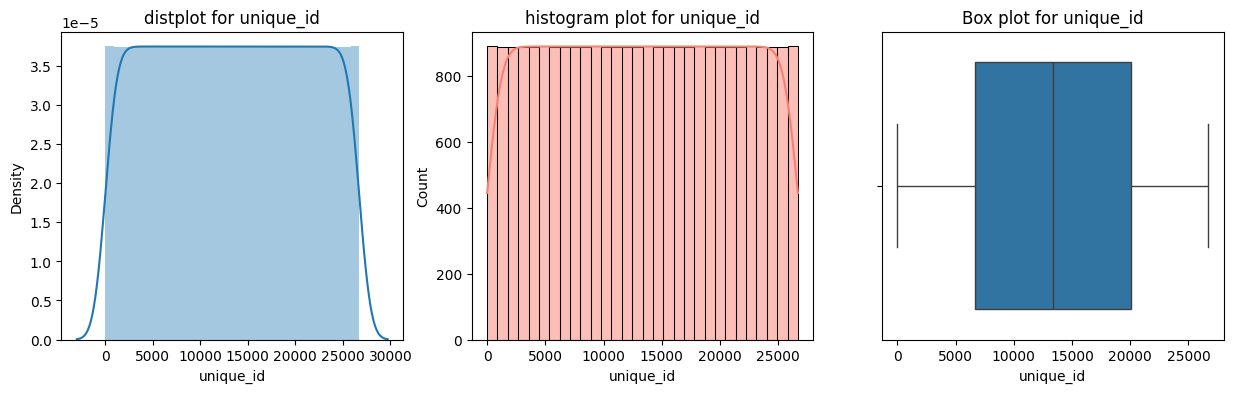

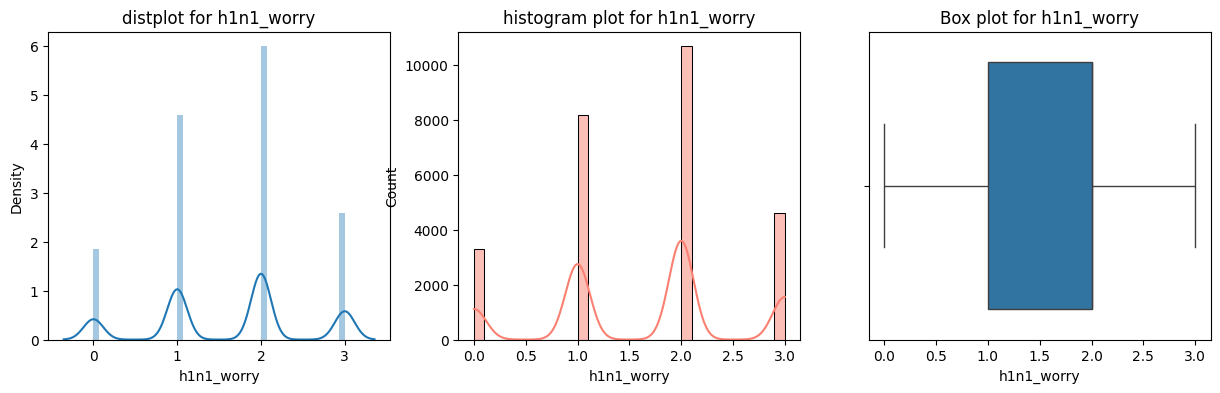

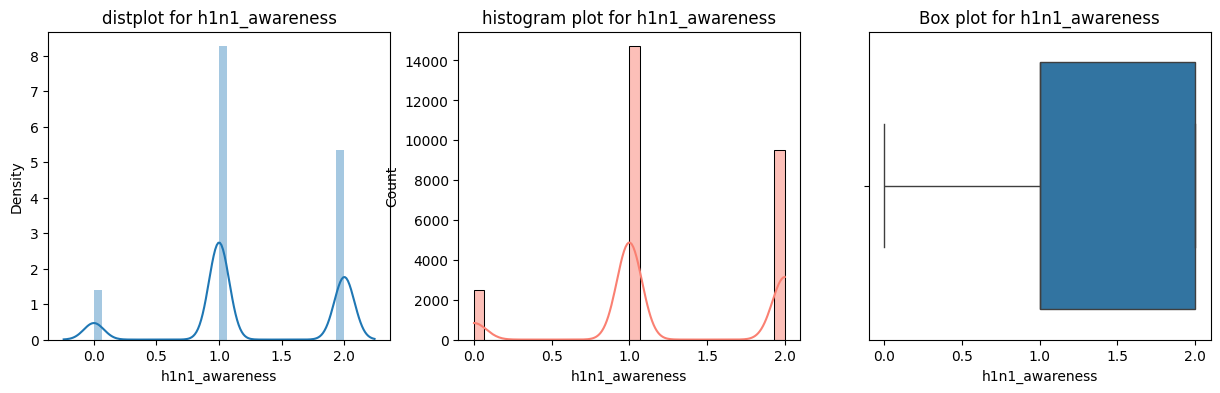

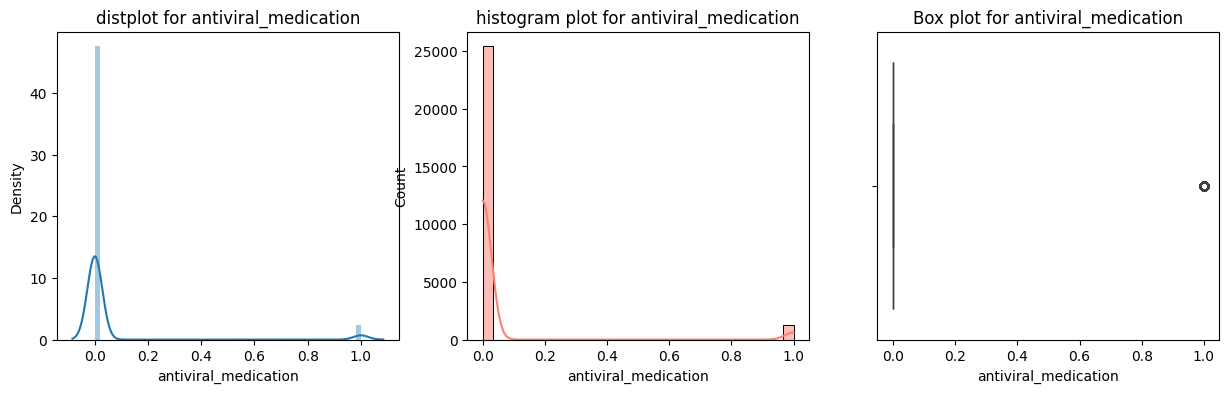

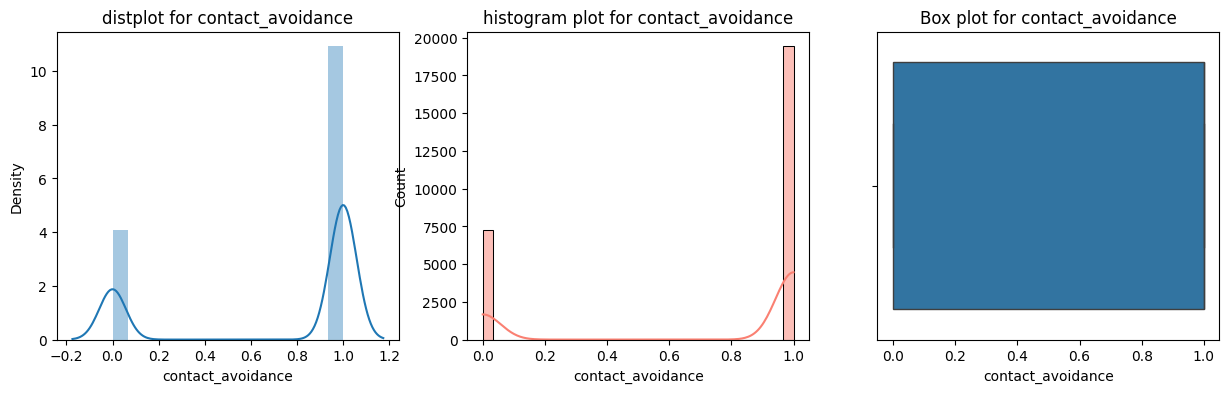

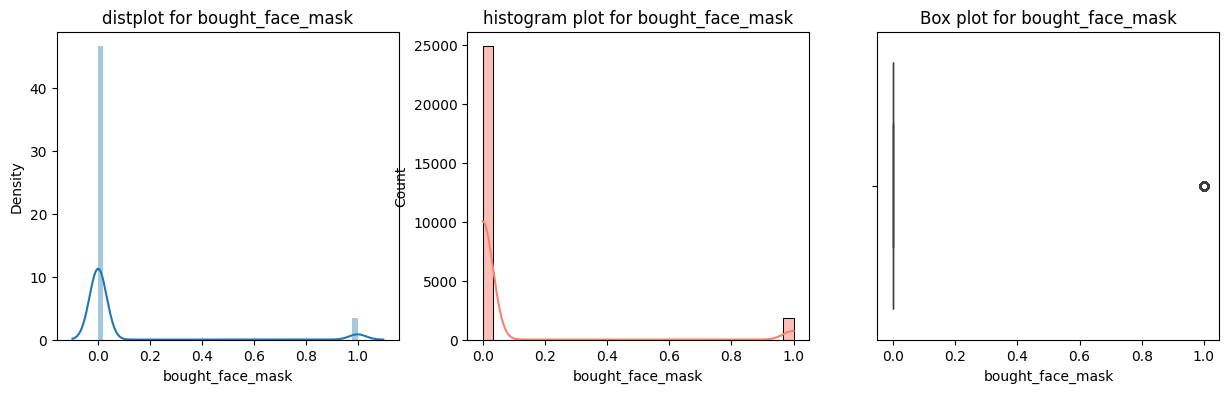

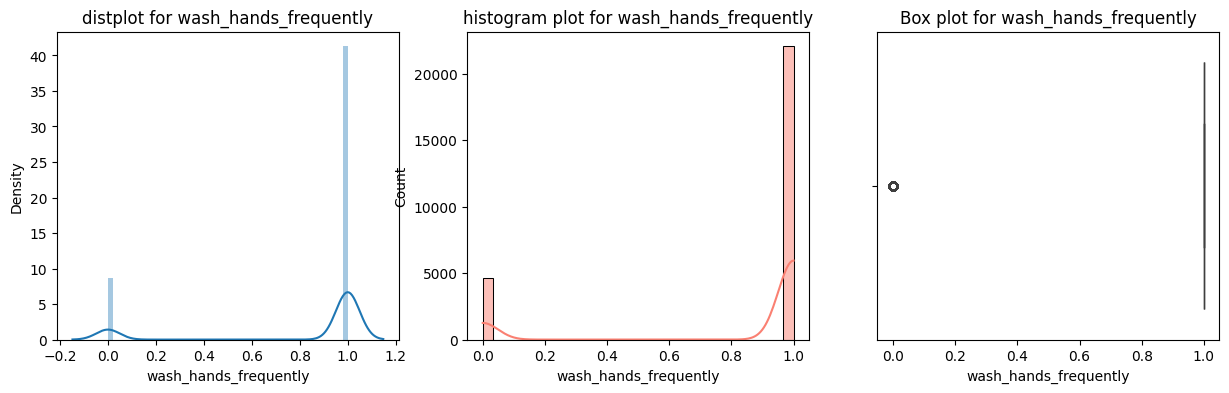

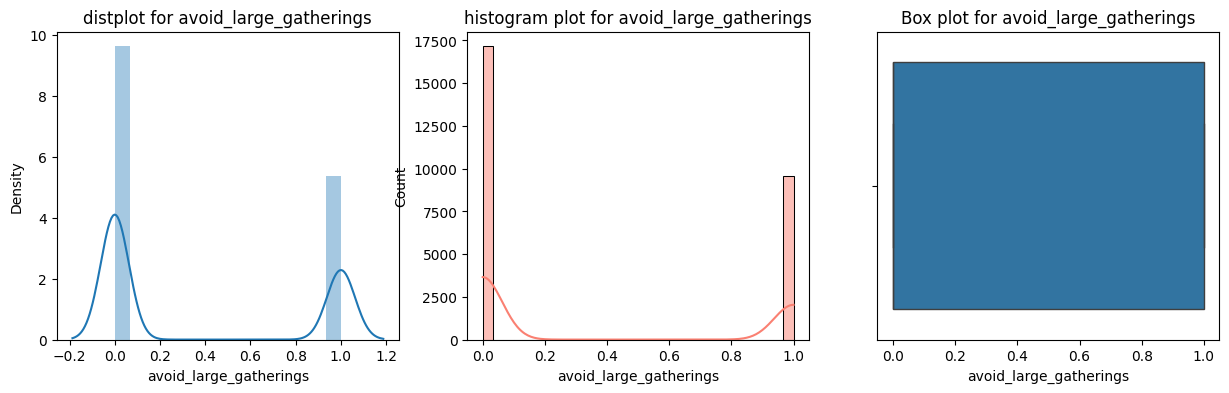

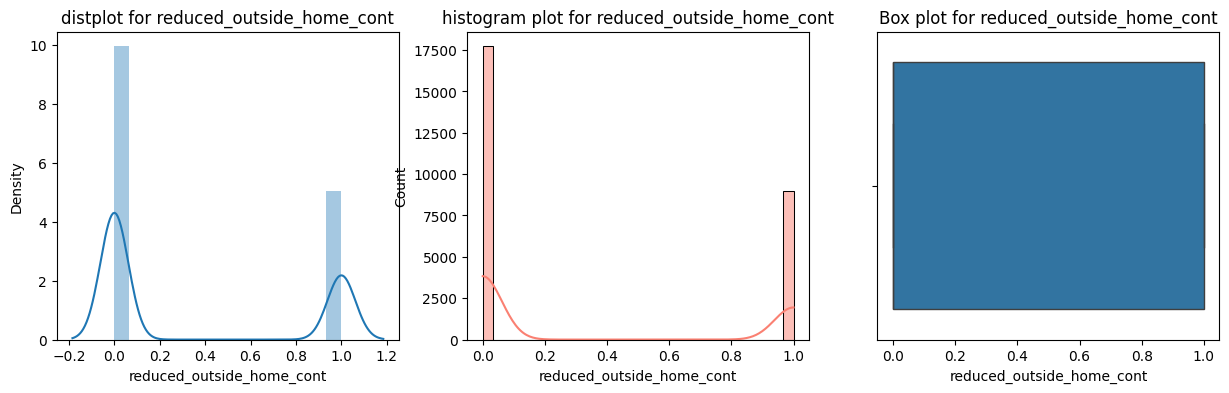

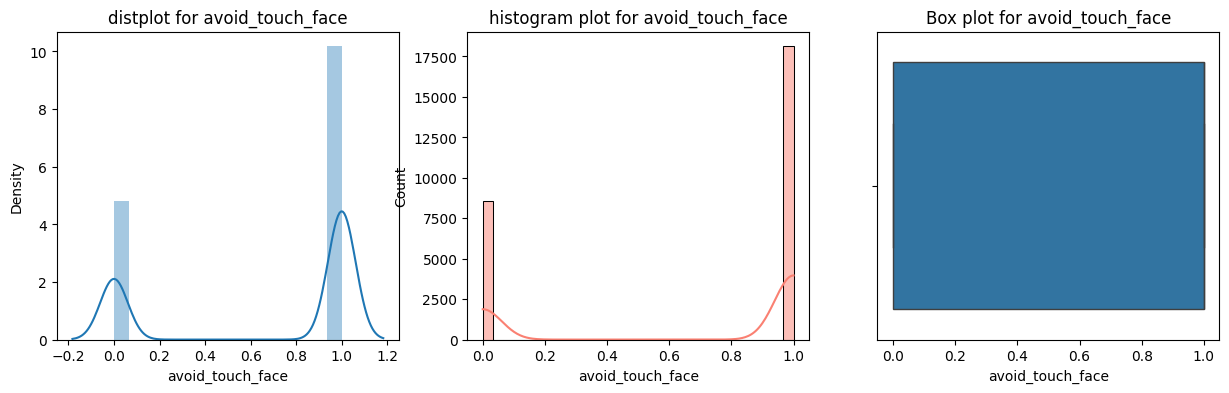

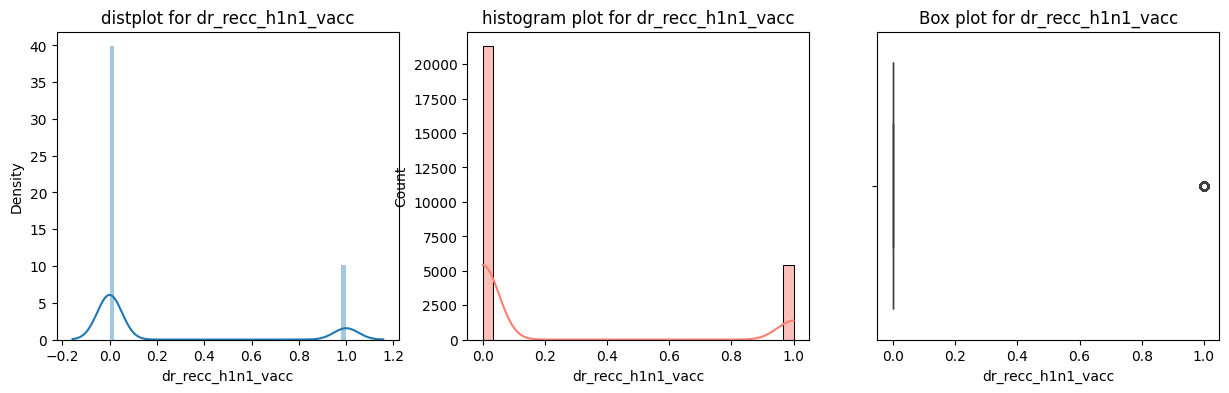

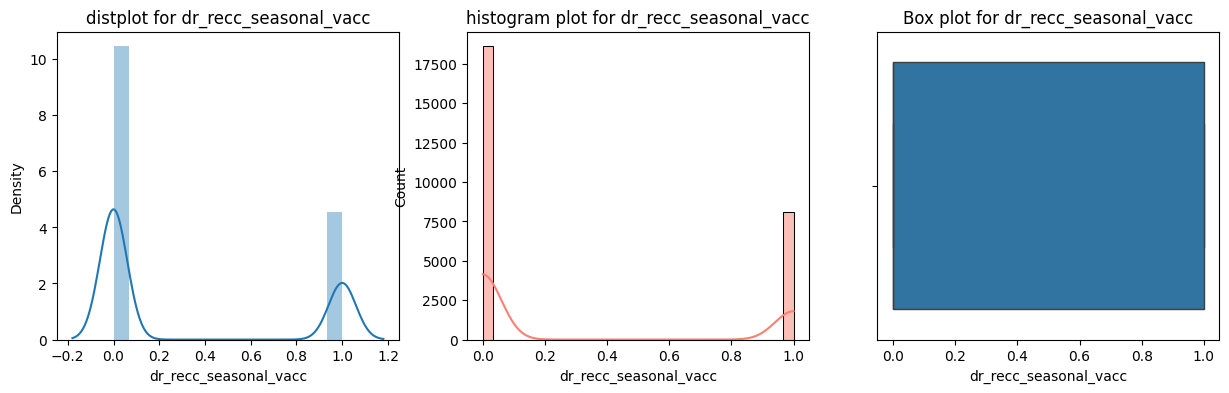

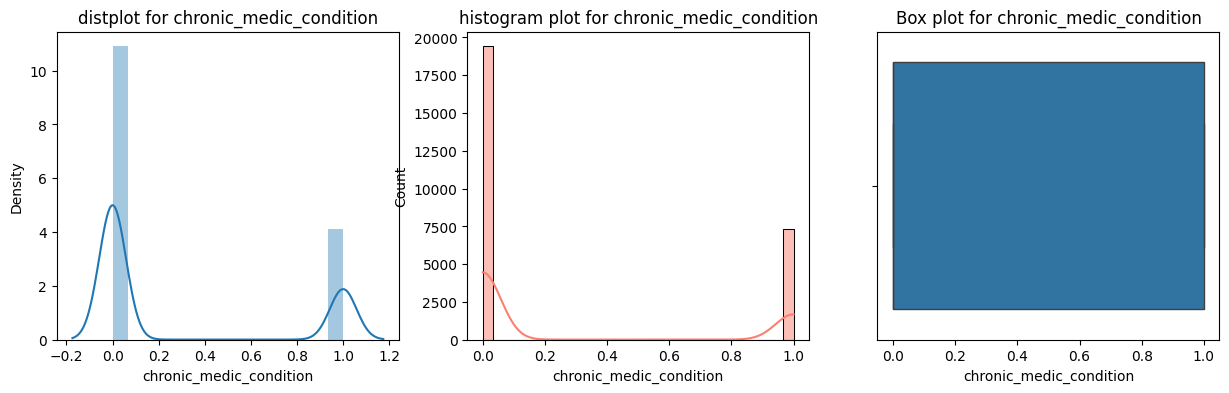

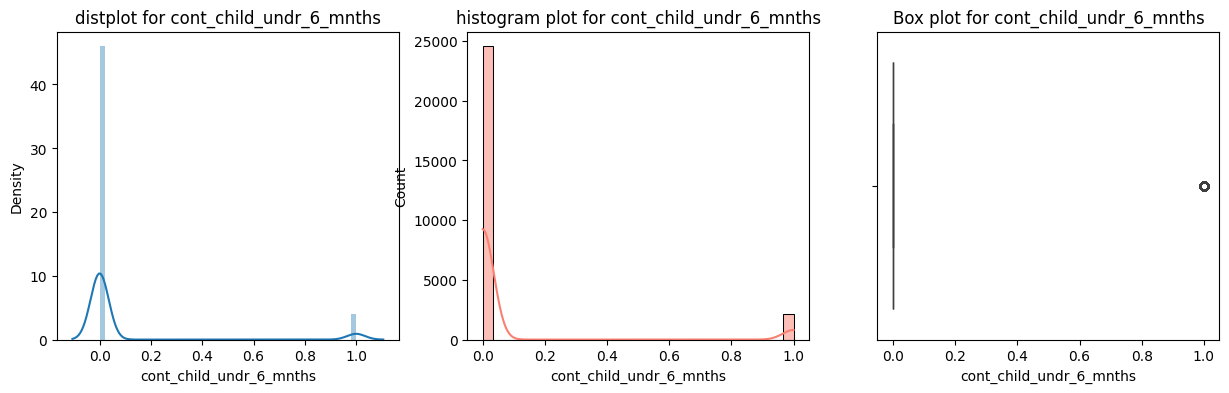

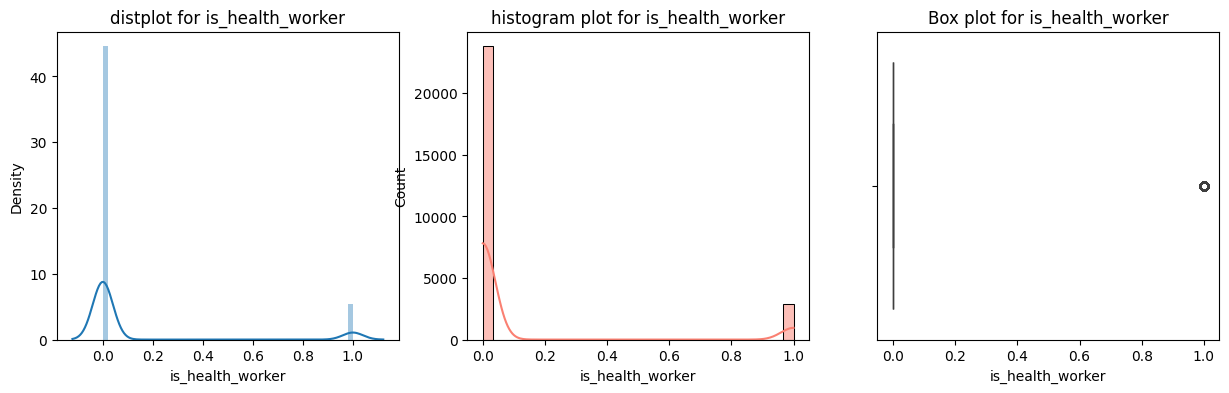

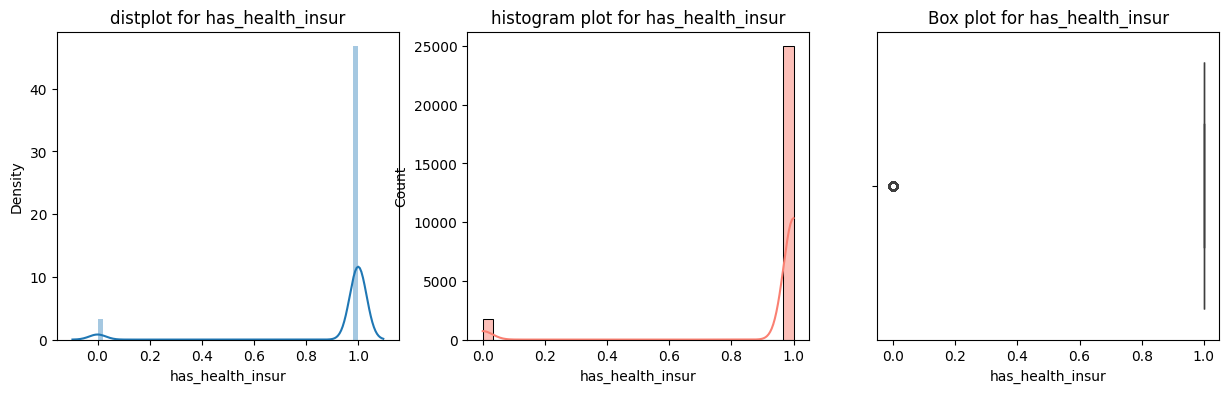

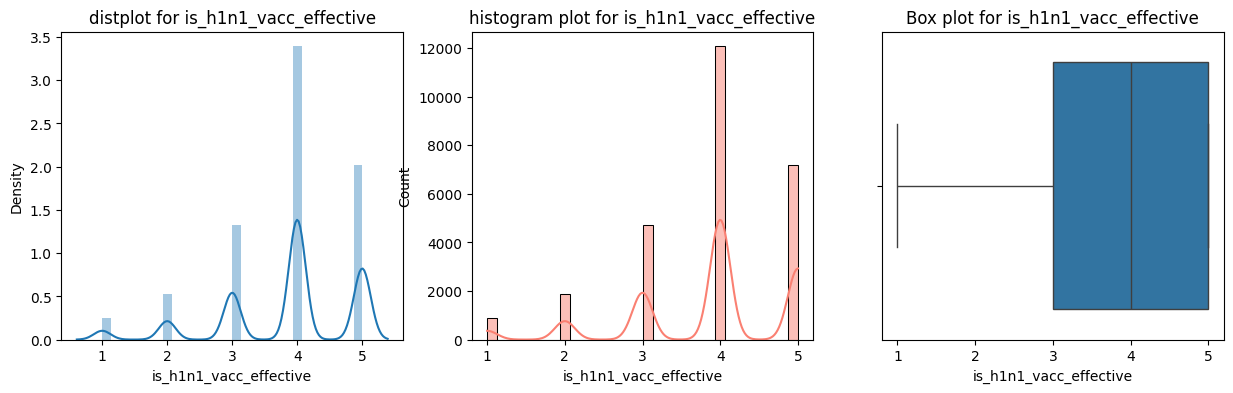

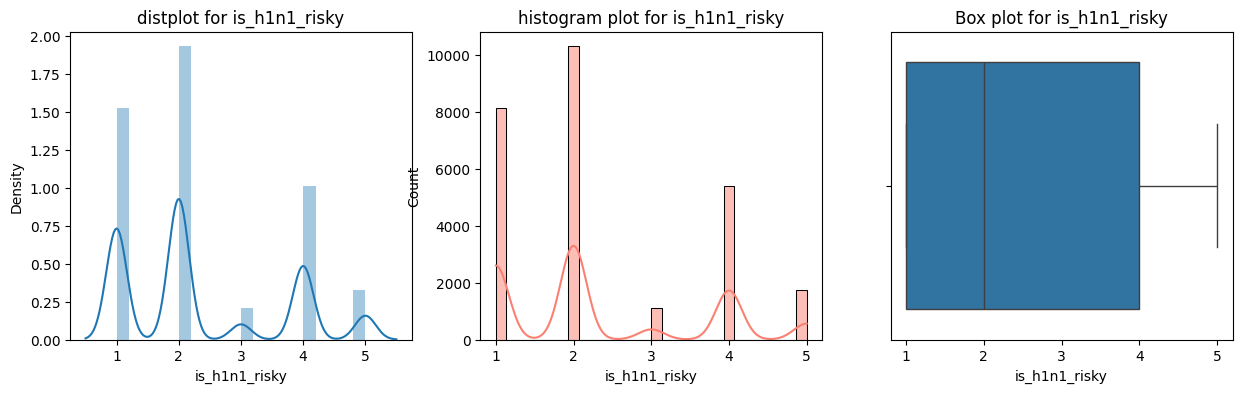

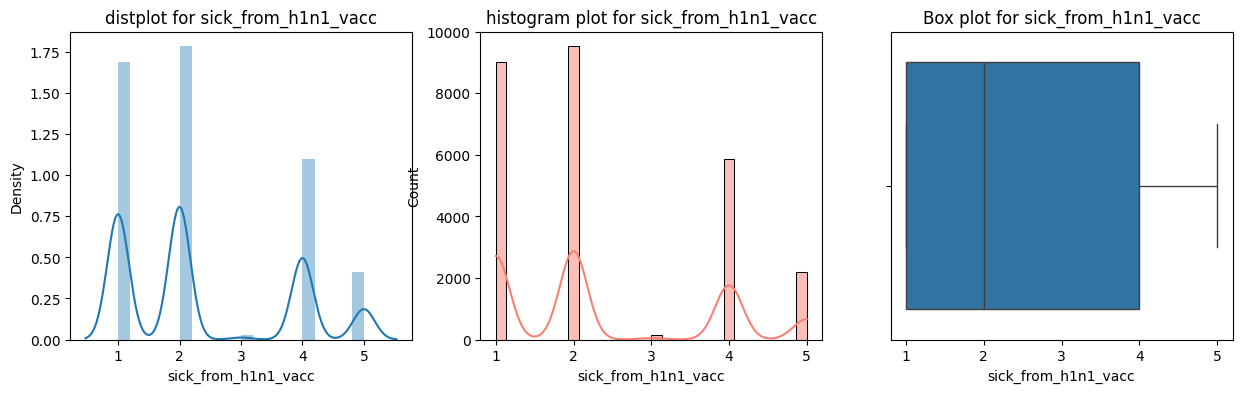

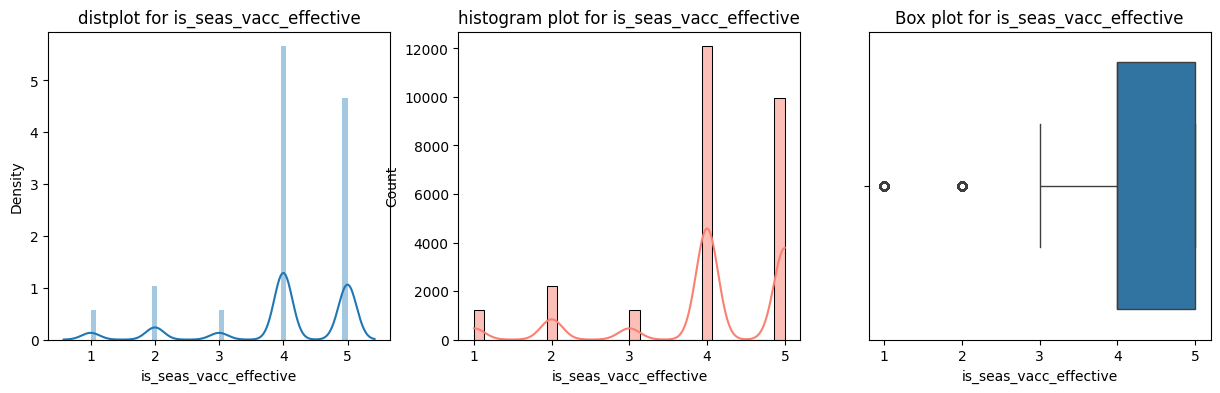

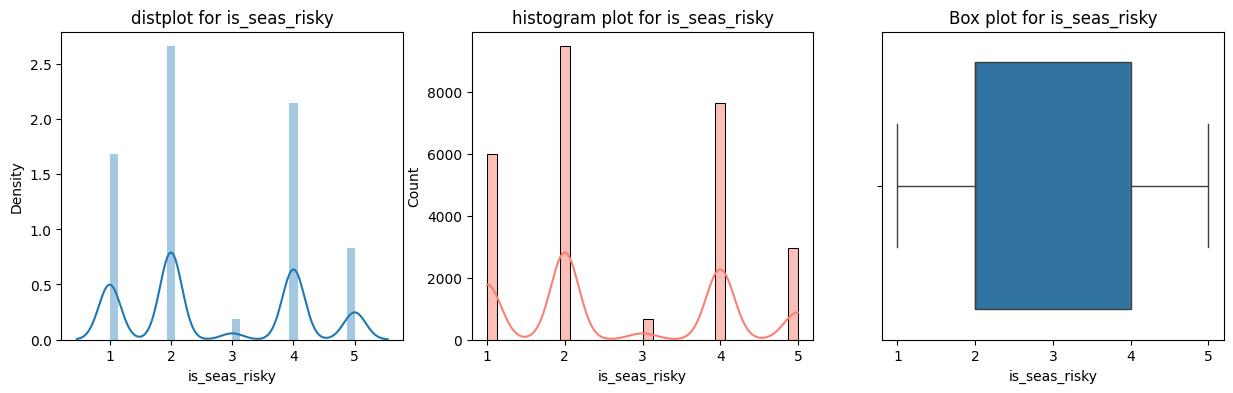

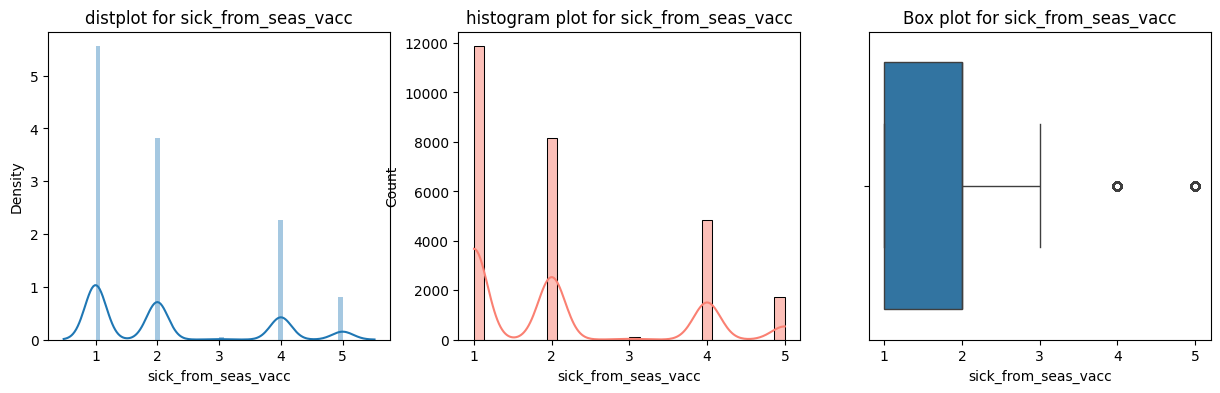

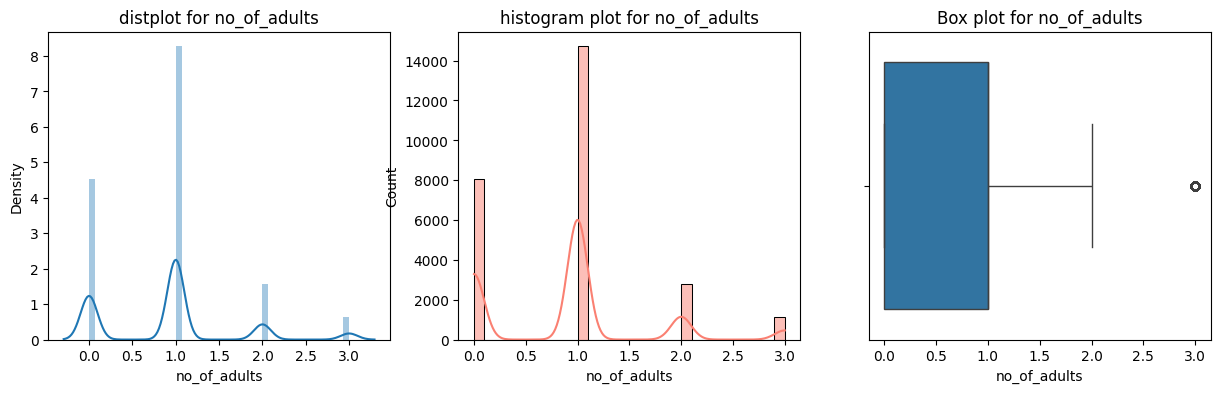

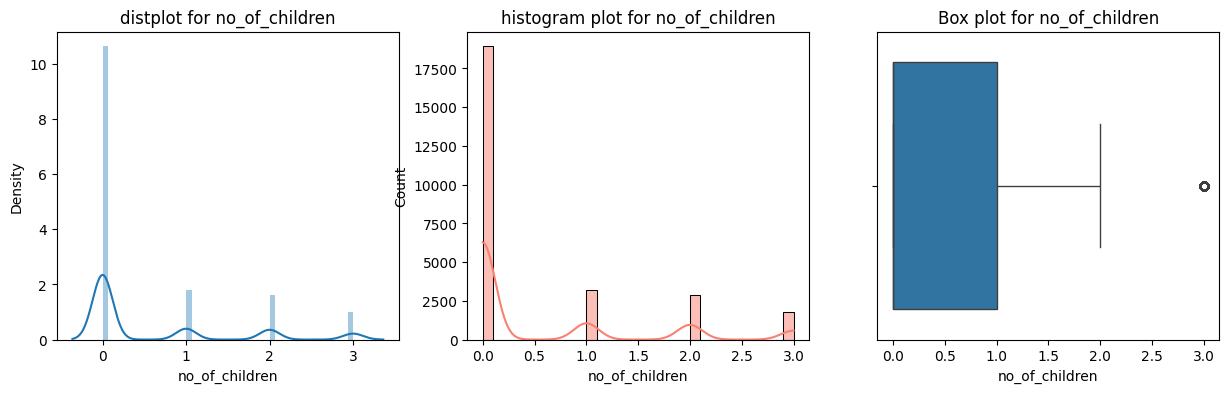

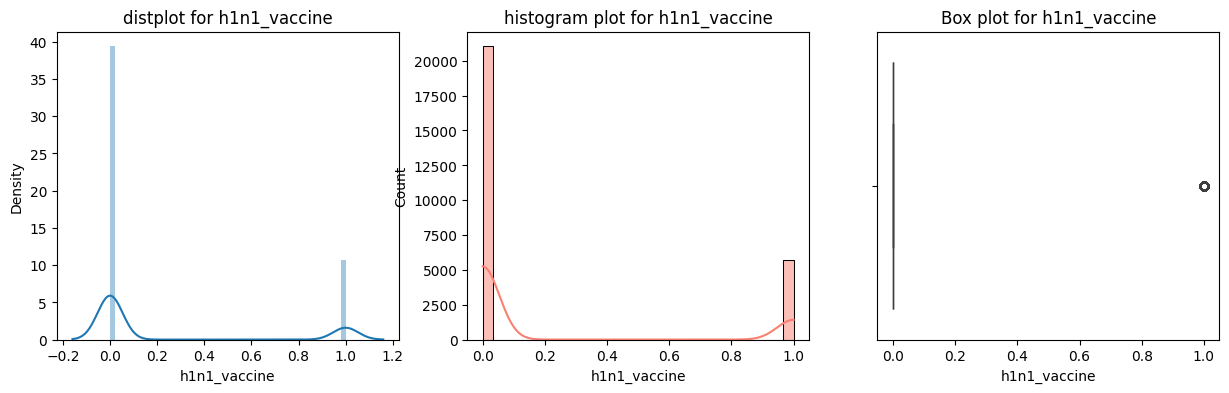

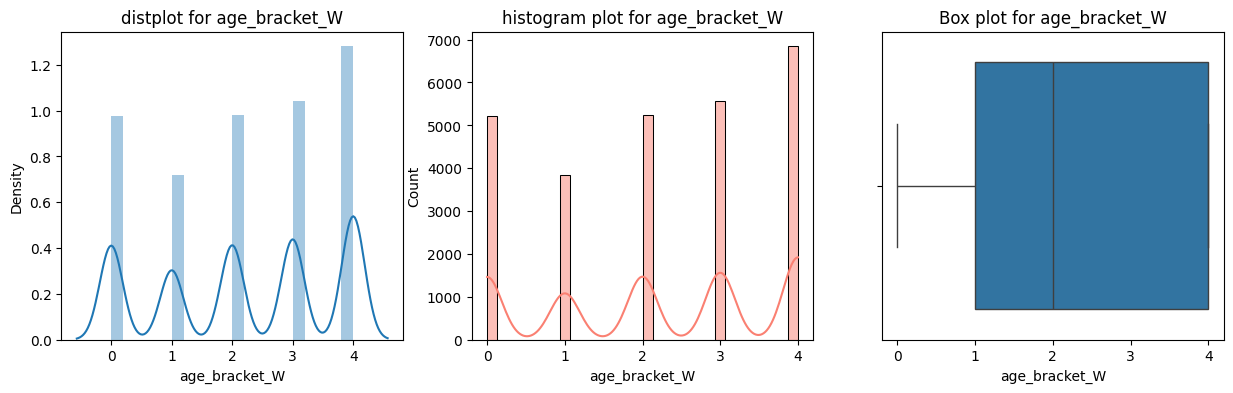

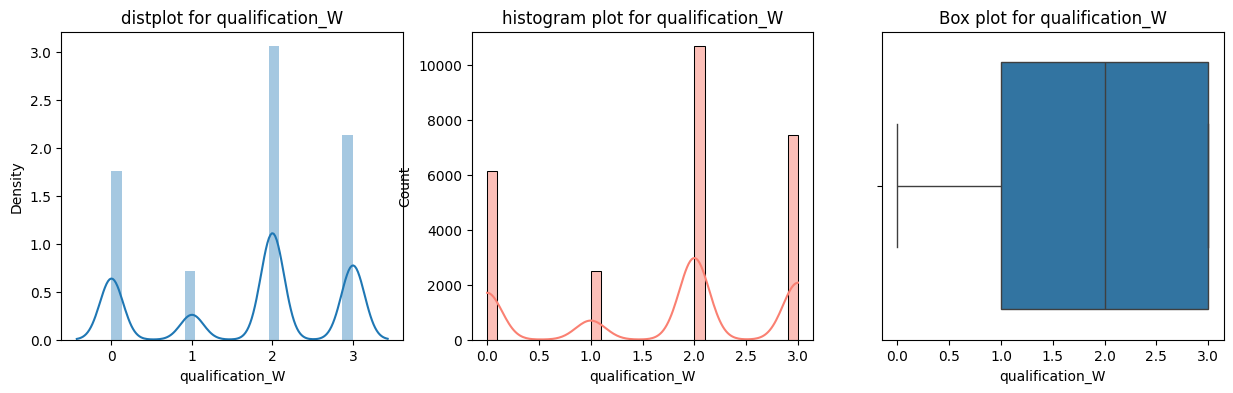

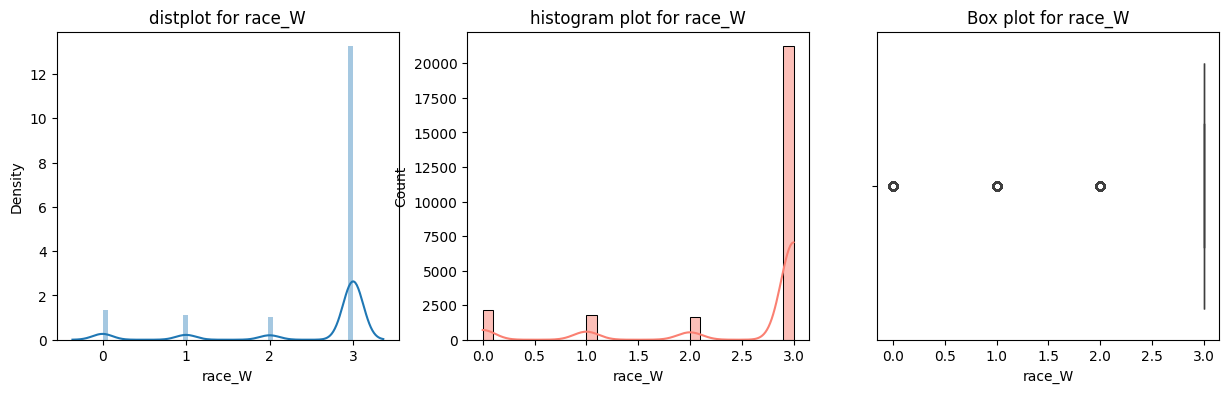

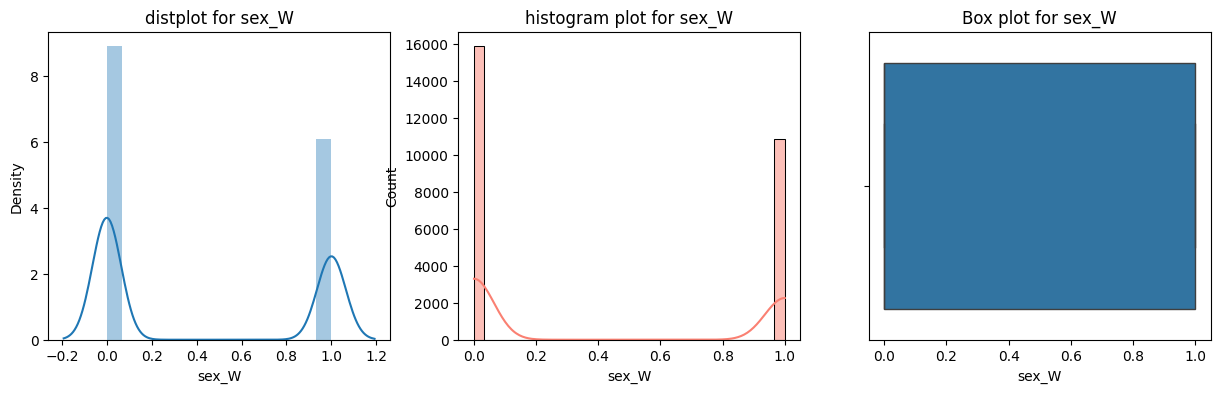

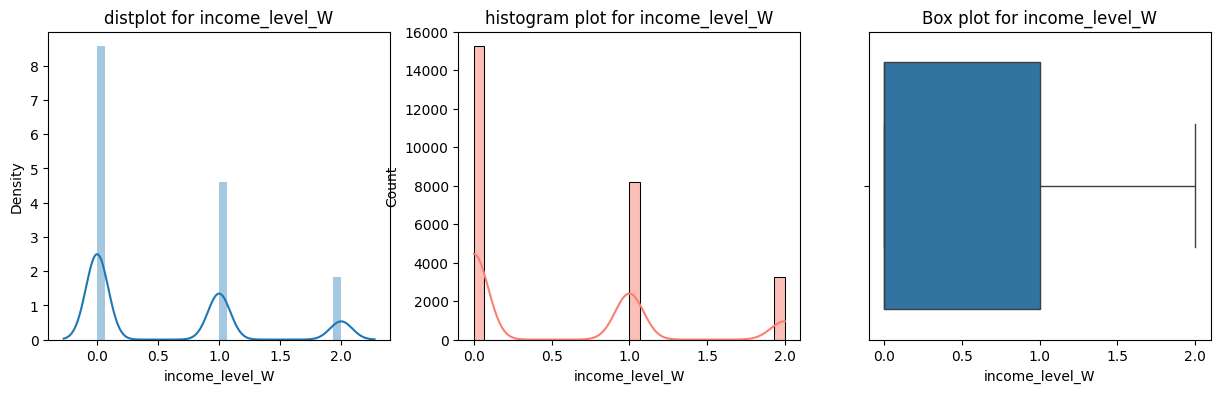

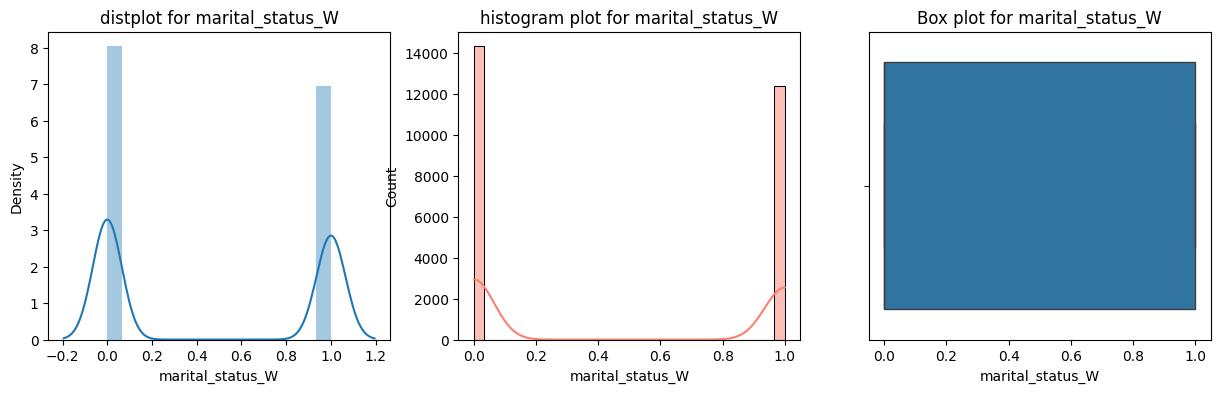

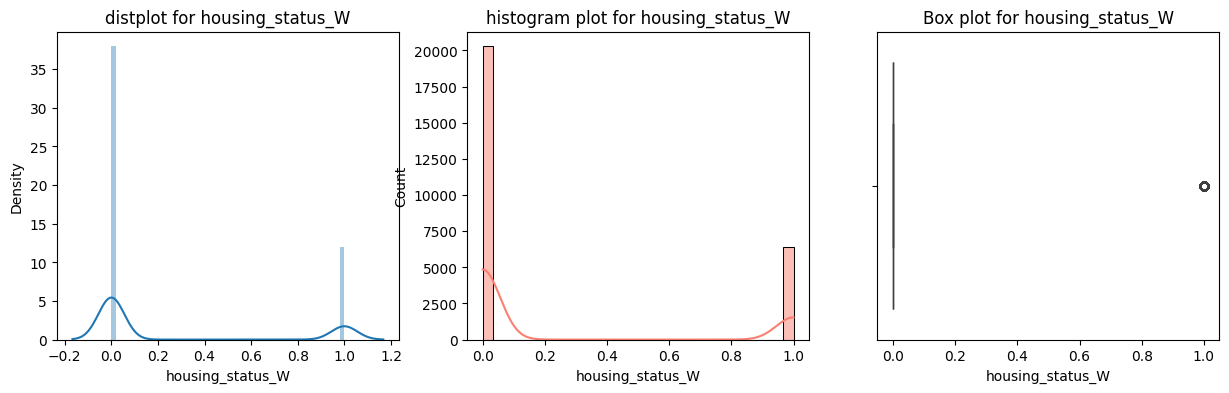

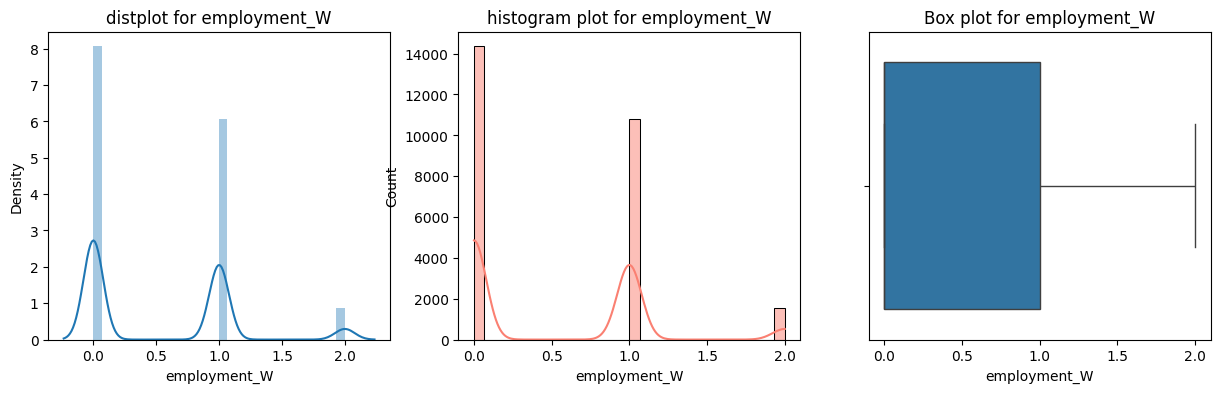

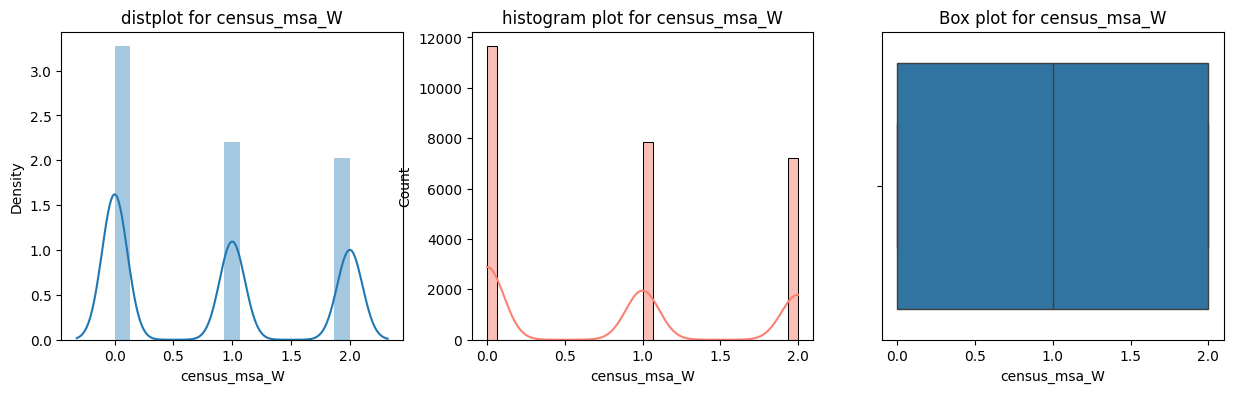

In [22]:
for i in df2.columns:
  plot(df2,i)

In [23]:
df2['h1n1_vaccine'].value_counts()

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

In [24]:
df2.shape

(26707, 34)

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE

X=df2.drop(columns=['h1n1_vaccine'])
y=df2['h1n1_vaccine']

# Proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [26]:
y_train_resampled.value_counts()

h1n1_vaccine
0    14722
1    14722
Name: count, dtype: int64

In [27]:
X_train_resampled.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0      25077           2               1                     0   
1      10106           2               2                     0   
2       9922           1               1                     0   
3      16506           2               1                     0   
4      13929           2               1                     0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                  1                 0                      1   
1                  1                 0                      1   
2                  1                 0                      1   
3                  1                 0                      1   
4                  1                 0                      1   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                       0                          0                 1  ...   
1                       0                          0                 1  ...   
2                       0                          1                 1  ...   
3                       0                          0                 0  ...   
4                       0                          1                 1  ...   

   no_of_children  age_bracket_W  qualification_W  race_W  sex_W  \
0               0              0                2       0      0   
1               0              3                2       3      0   
2               0              0                2       3      0   
3               0              4                2       3      0   
4               0              0                2       3      0   

   income_level_W  marital_status_W  housing_status_W  employment_W  \
0               0                 0                 0             1   
1               1                 0                 0             0   
2               0                 0                 0             0   
3               0                 1                 0             1   
4               0                 1                 0             0   

   census_msa_W  
0             2  
1             1  
2             2  
3             2  
4             1  

[5 rows x 33 columns]

In [28]:
y_train_resampled.head()

0    0
1    0
2    0
3    1
4    0
Name: h1n1_vaccine, dtype: int64

In [29]:
df_resam = pd.concat([X_train_resampled,y_train_resampled],axis=1)

In [30]:
df_resam.head(2)

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0      25077           2               1                     0   
1      10106           2               2                     0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                  1                 0                      1   
1                  1                 0                      1   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                       0                          0                 1  ...   
1                       0                          0                 1  ...   

   age_bracket_W  qualification_W  race_W  sex_W  income_level_W  \
0              0                2       0      0               0   
1              3                2       3      0               1   

   marital_status_W  housing_status_W  employment_W  census_msa_W  \
0                 0                 0             1             2   
1                 0                 0             0             1   

   h1n1_vaccine  
0             0  
1             0  

[2 rows x 34 columns]

In [31]:
df_resam.shape

(29444, 34)

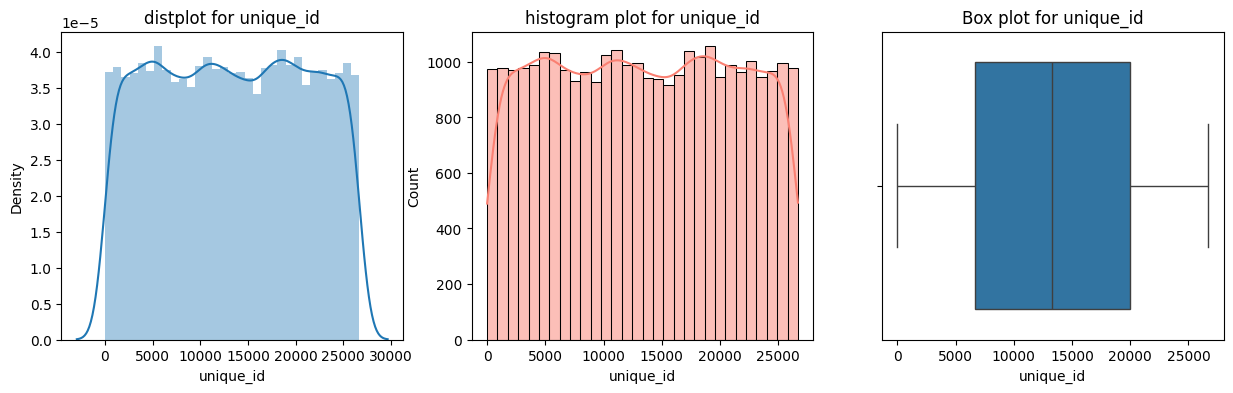

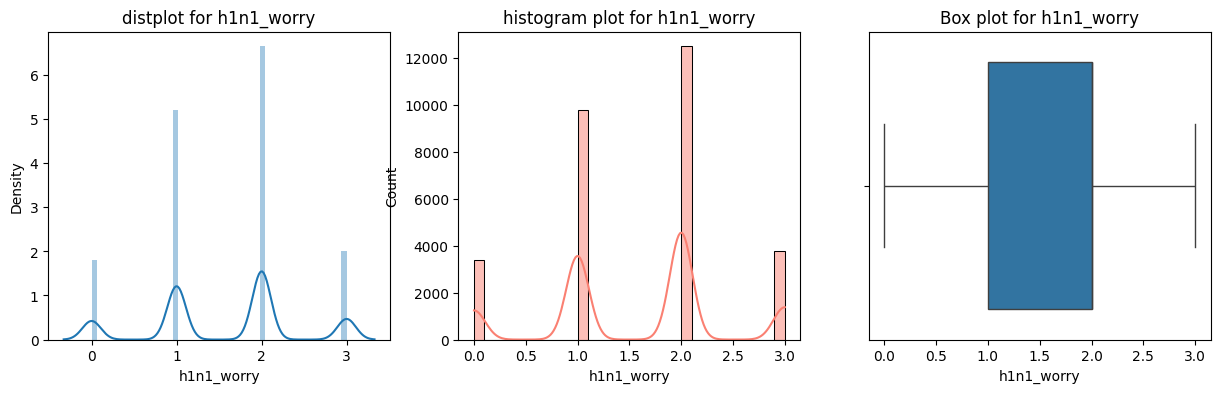

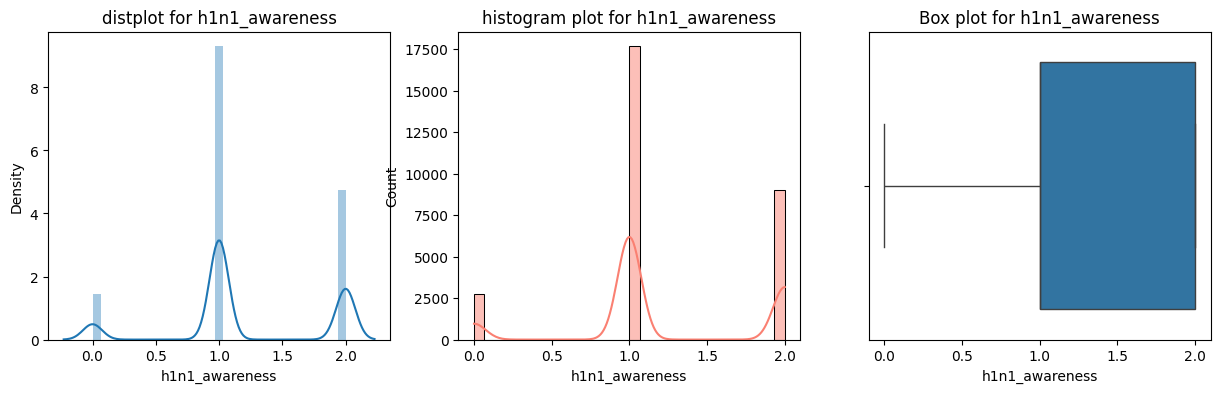

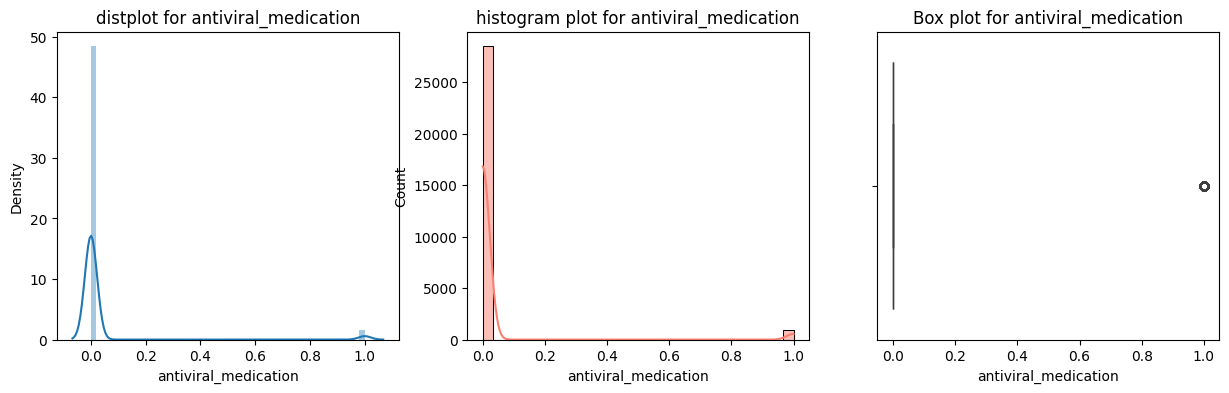

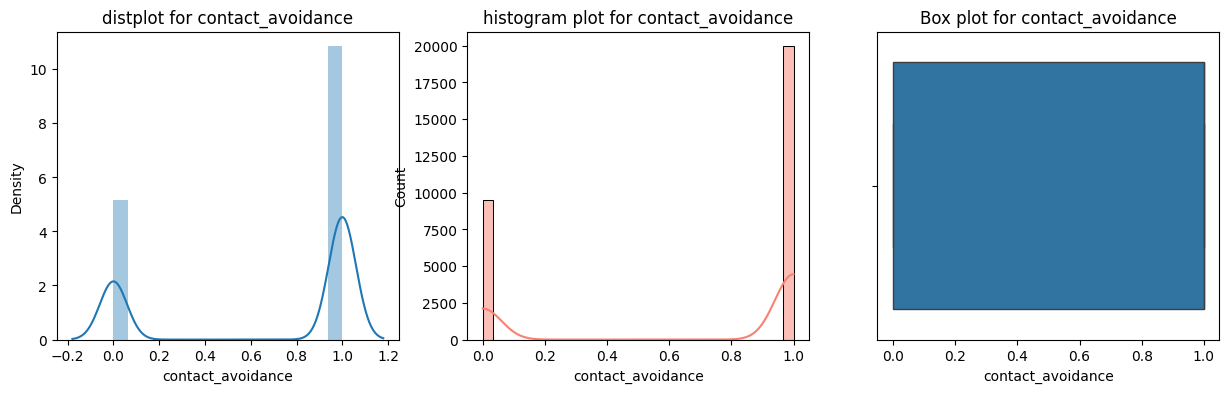

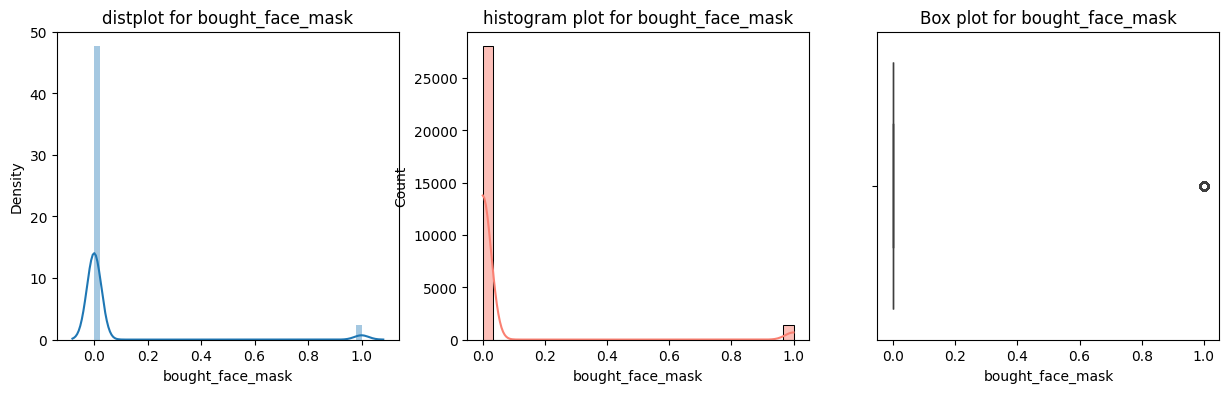

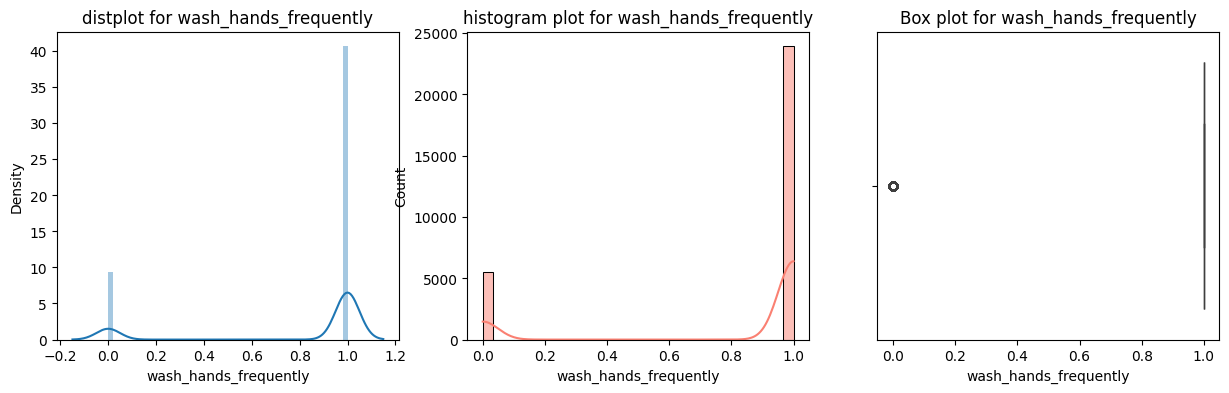

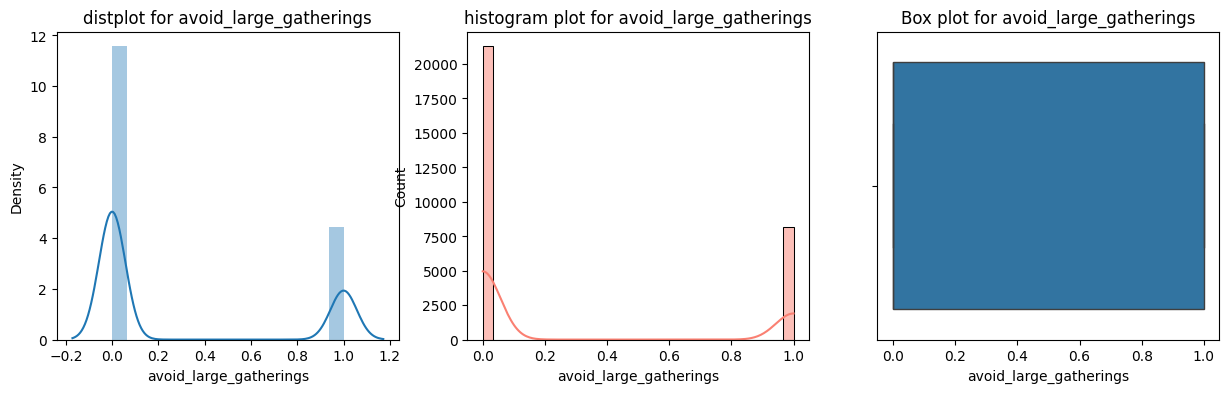

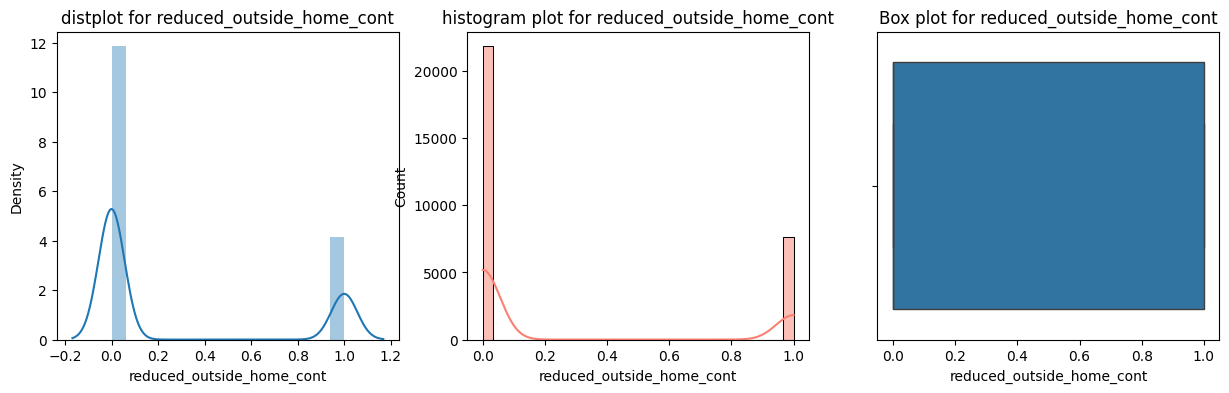

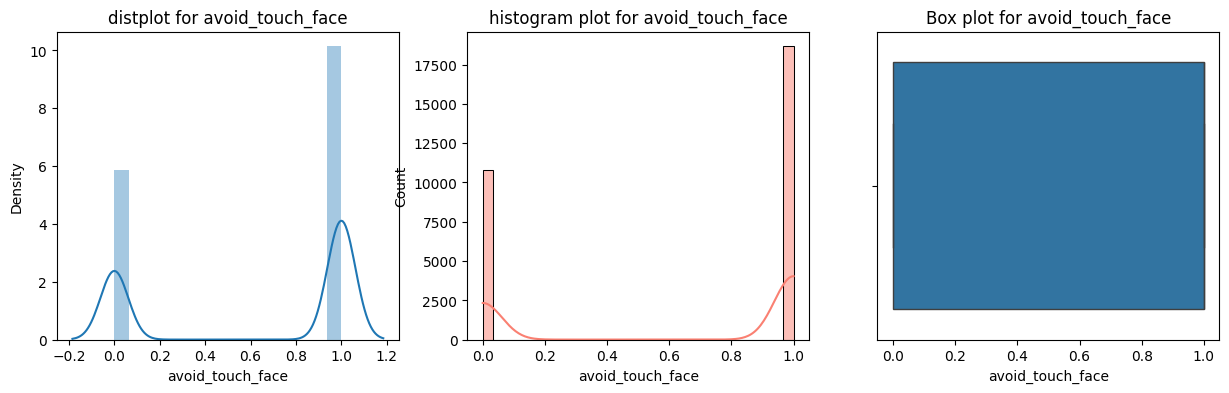

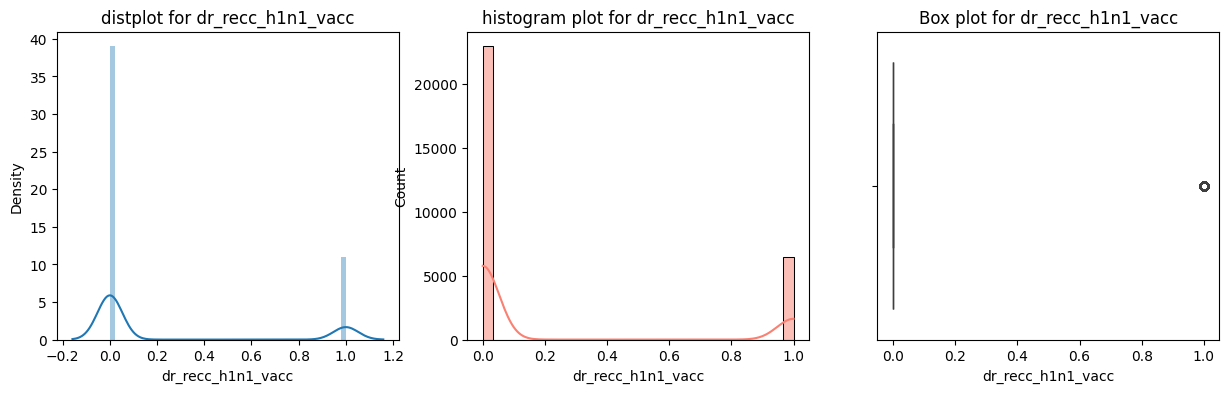

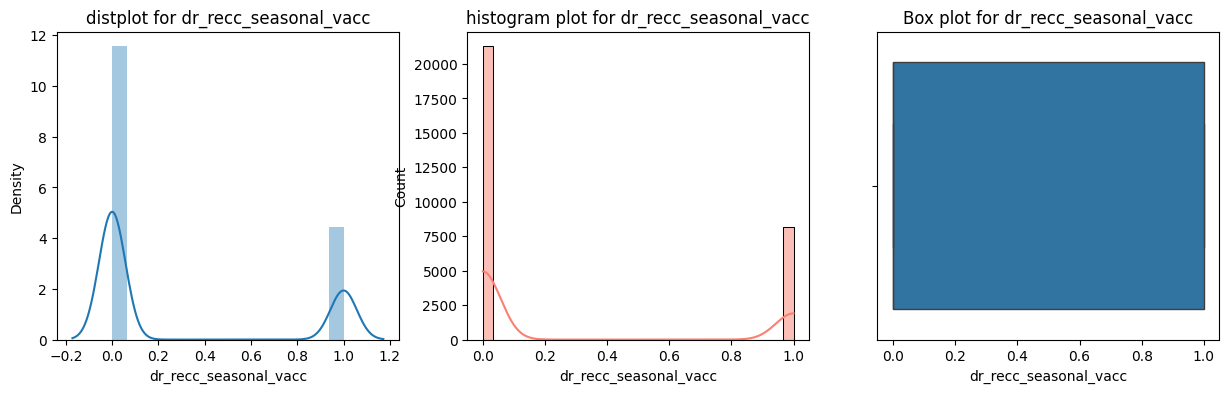

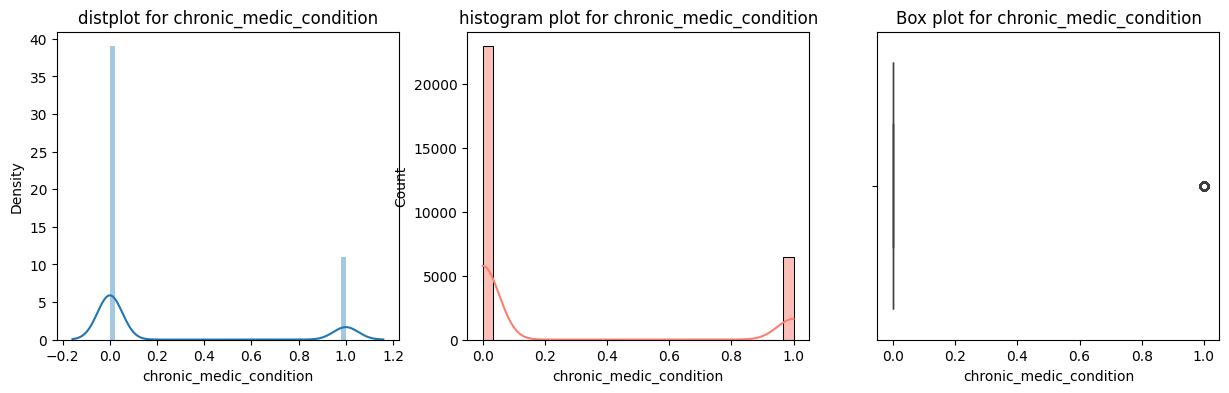

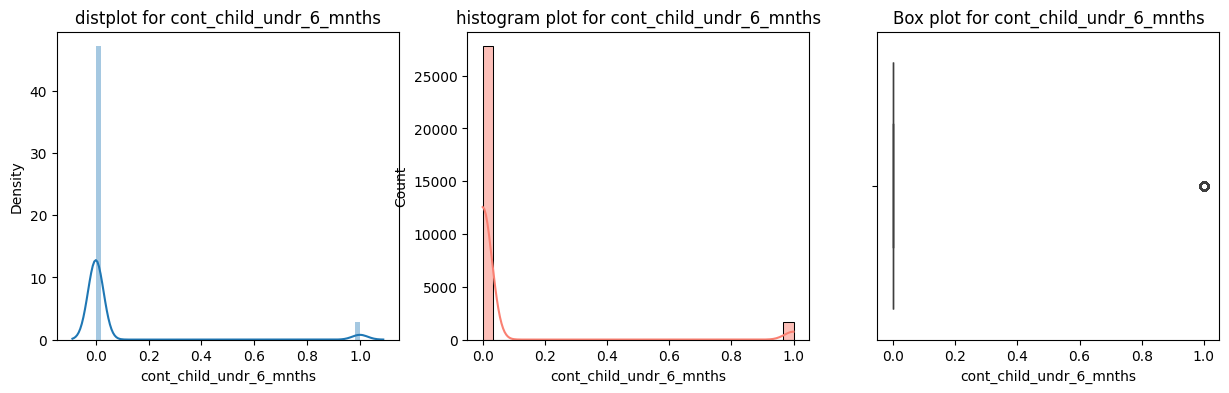

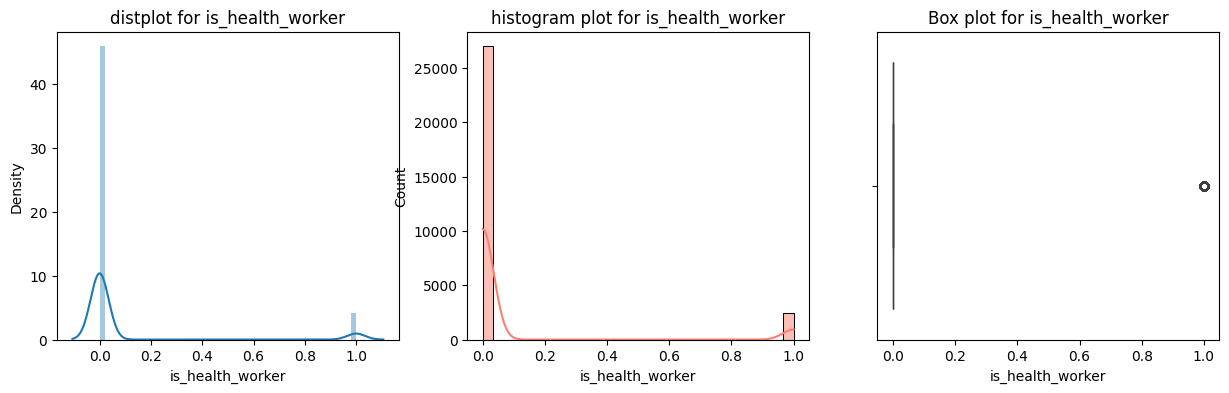

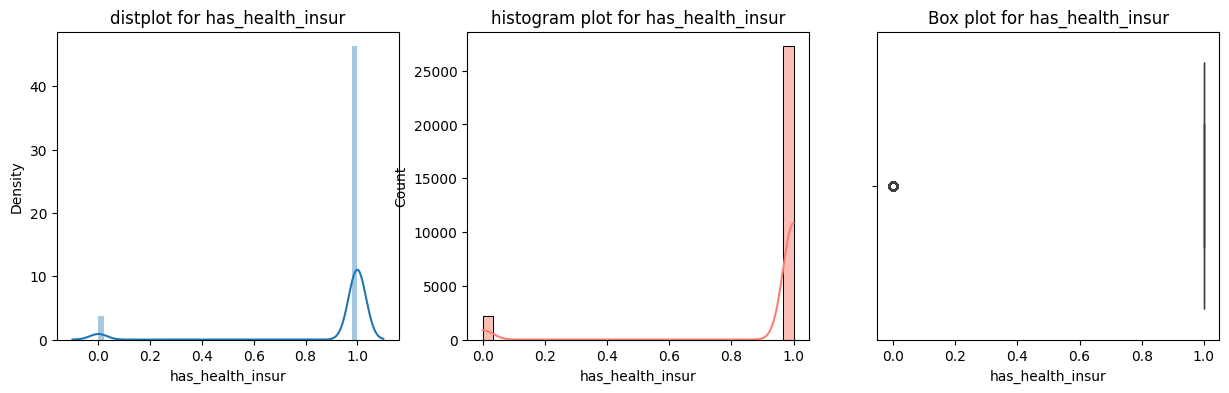

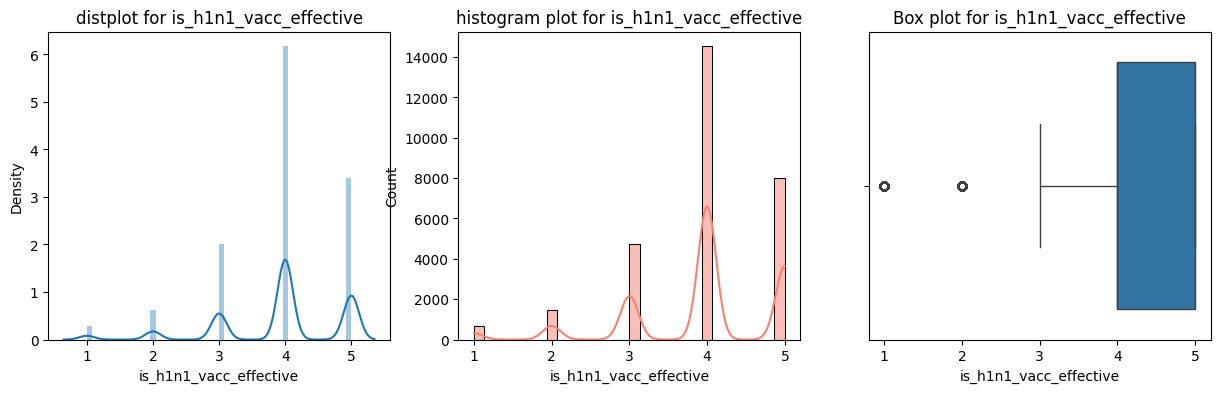

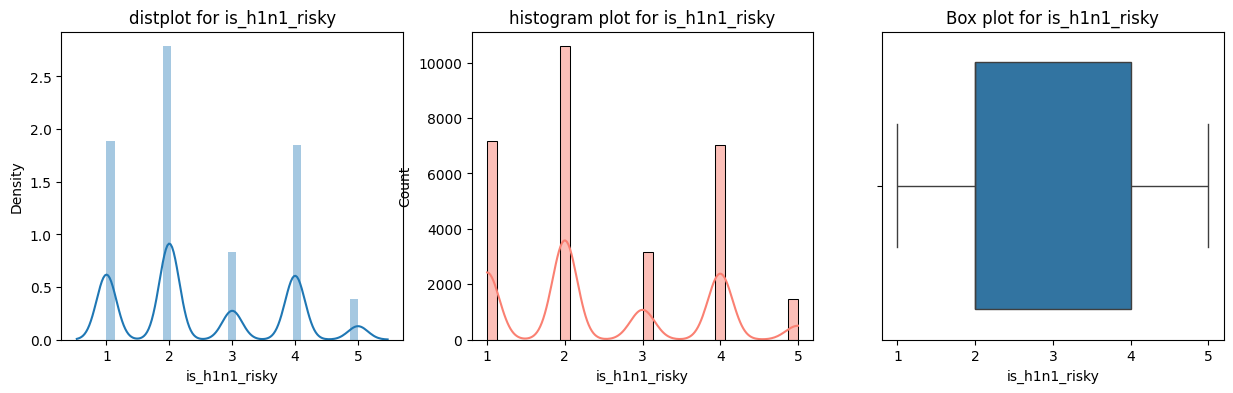

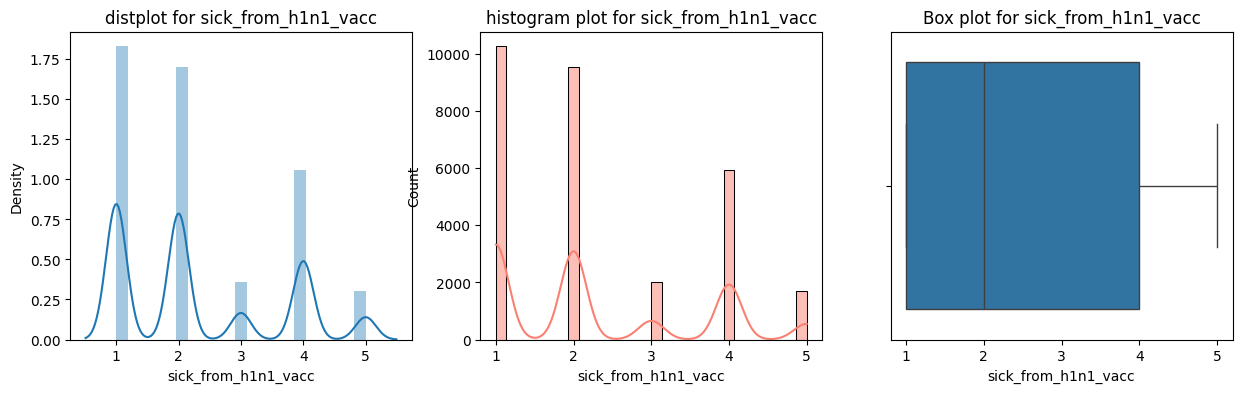

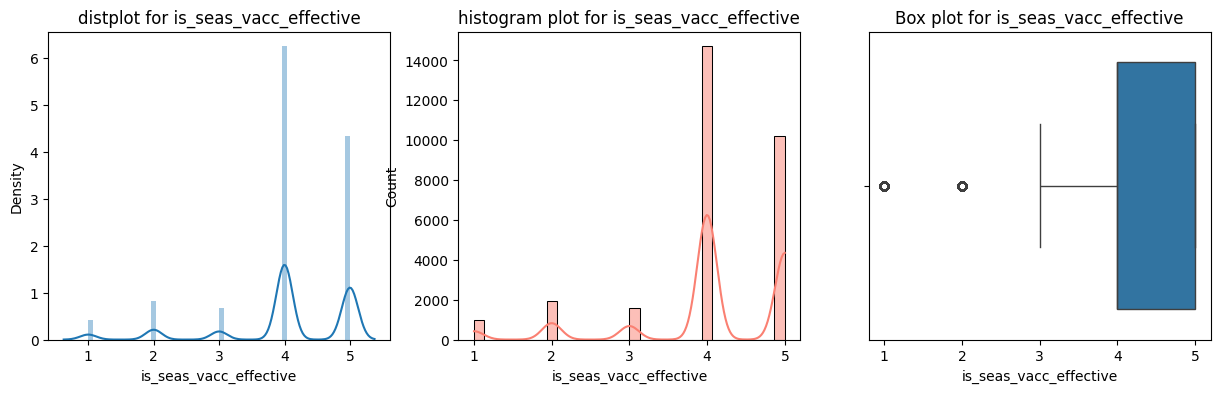

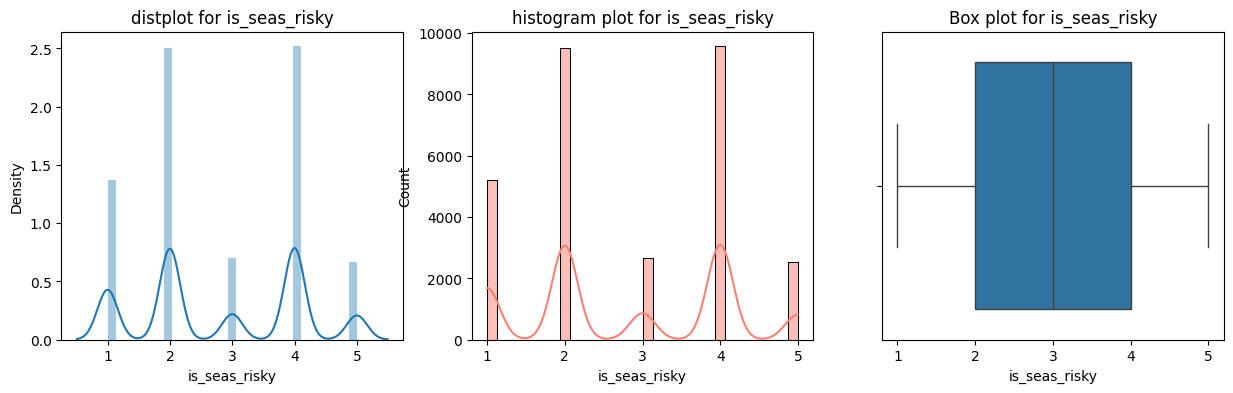

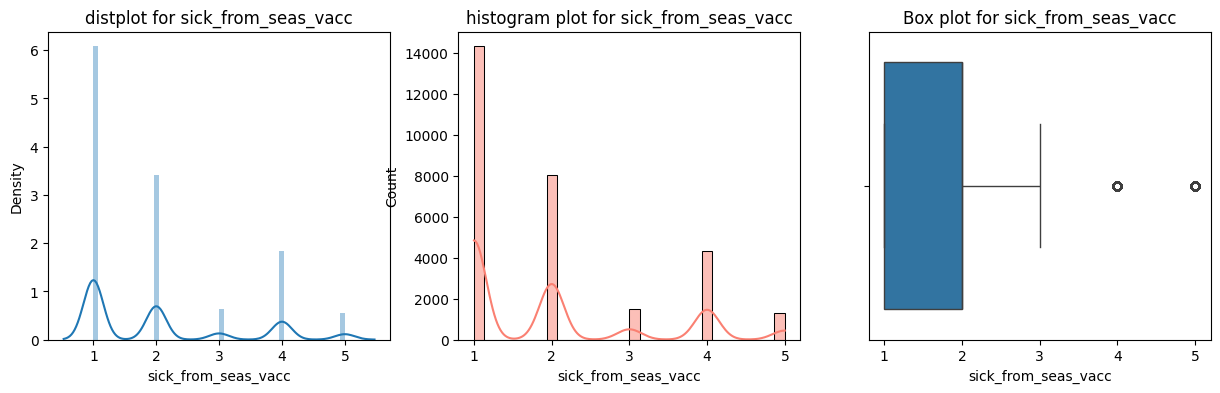

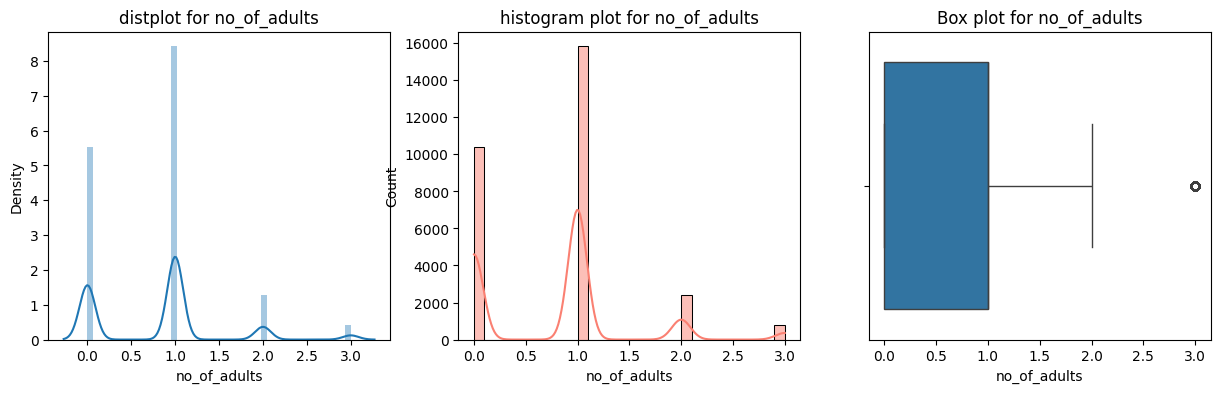

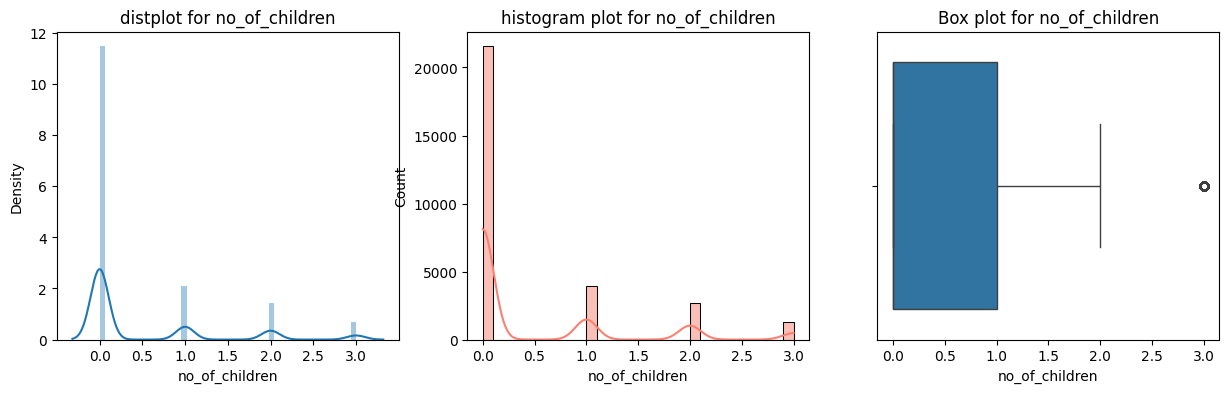

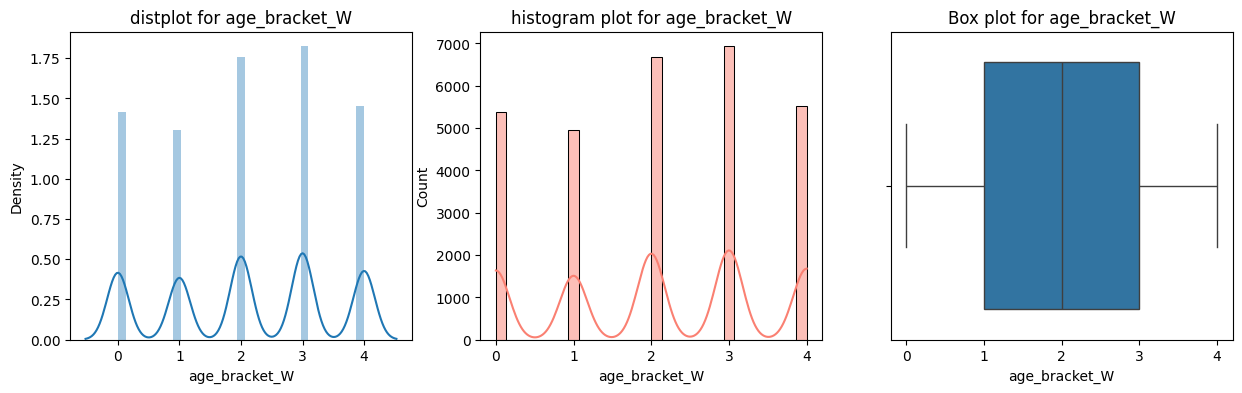

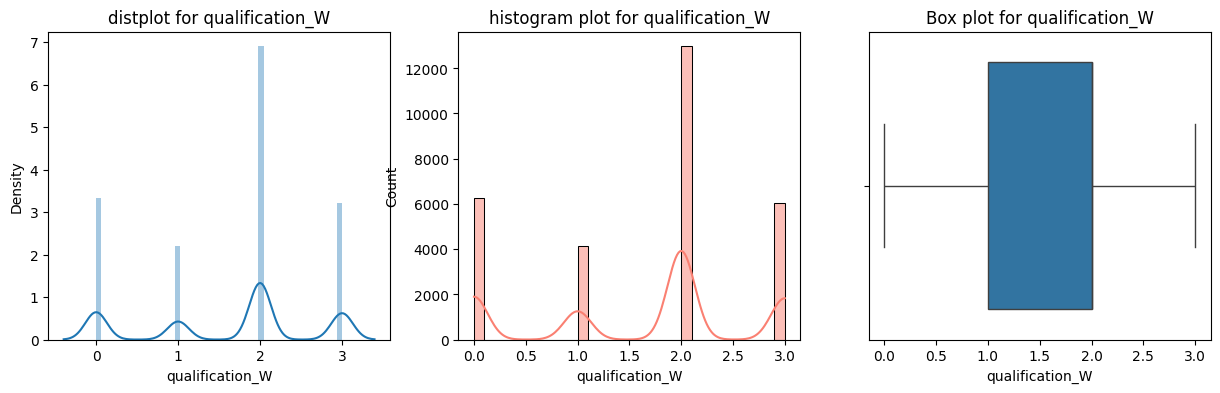

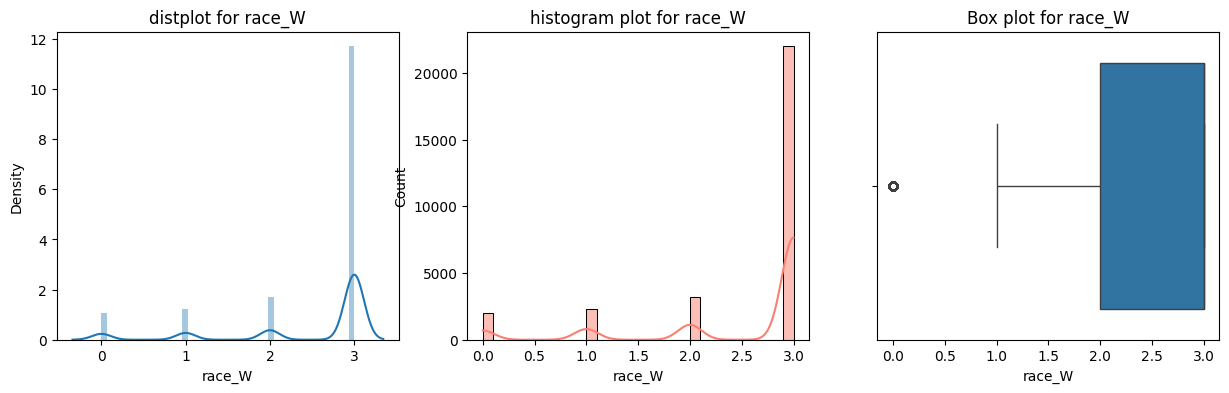

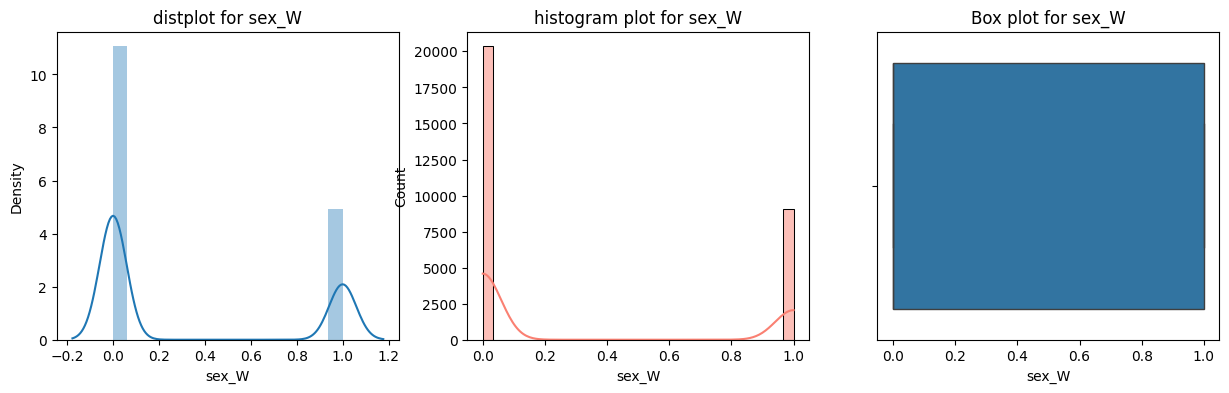

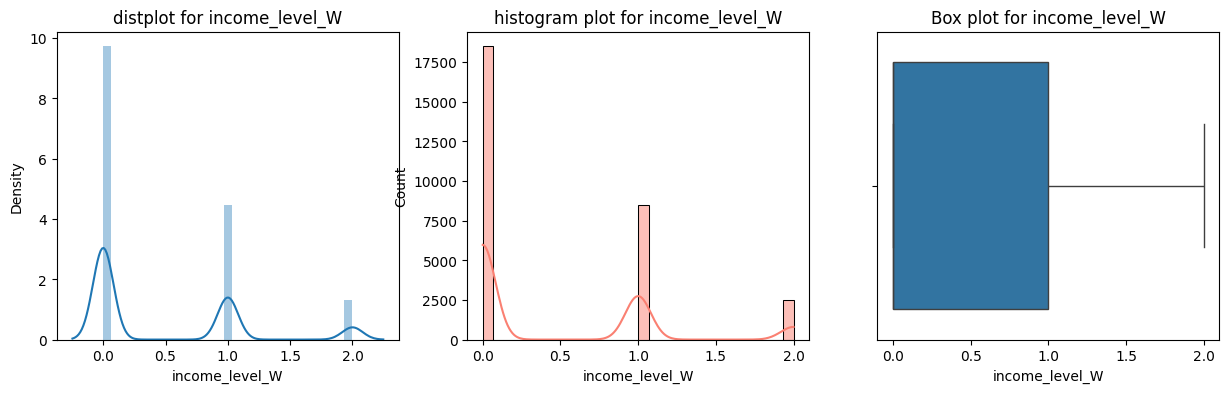

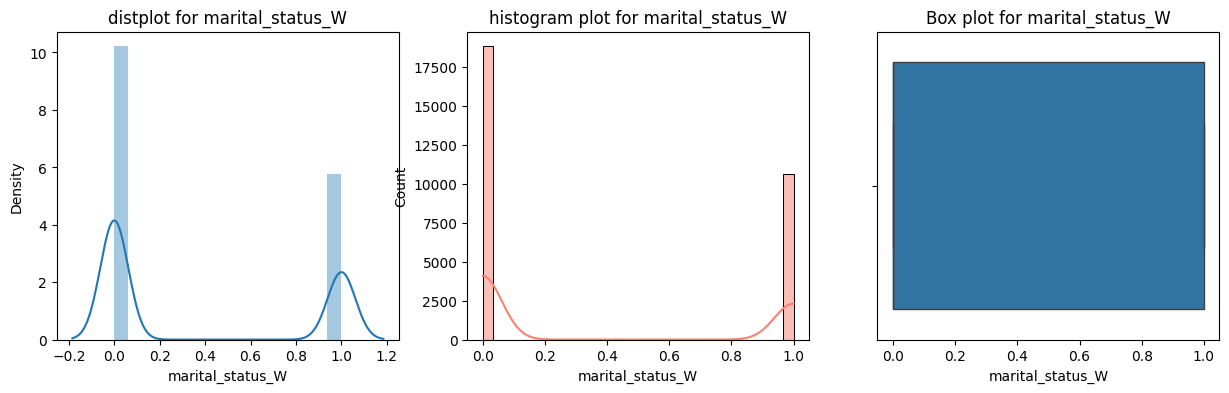

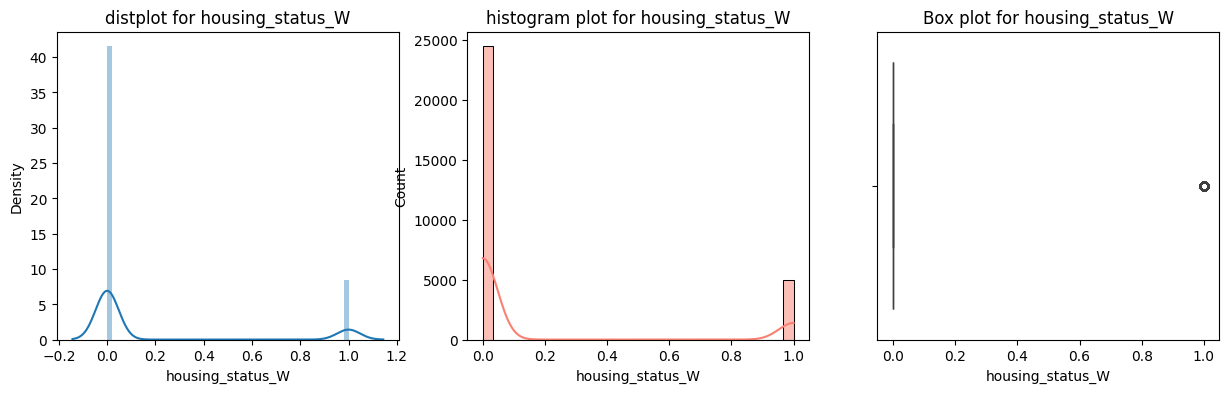

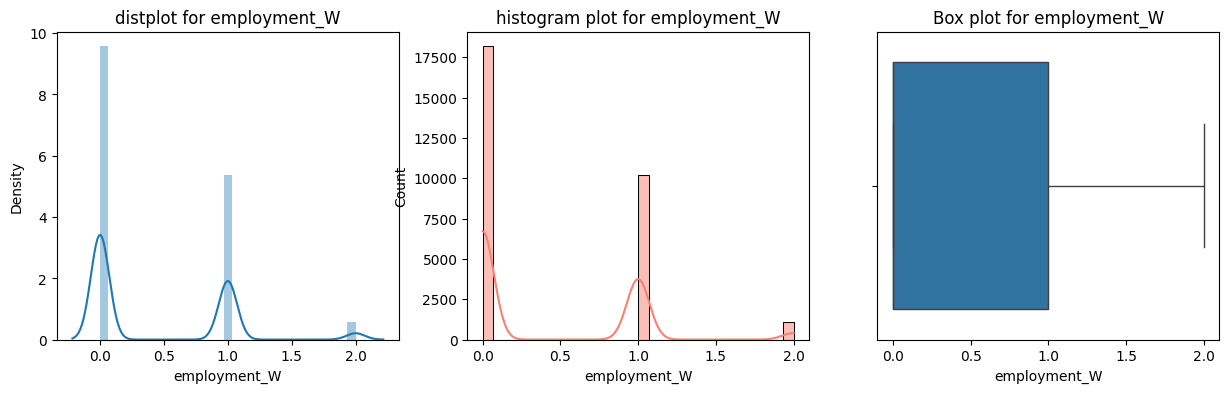

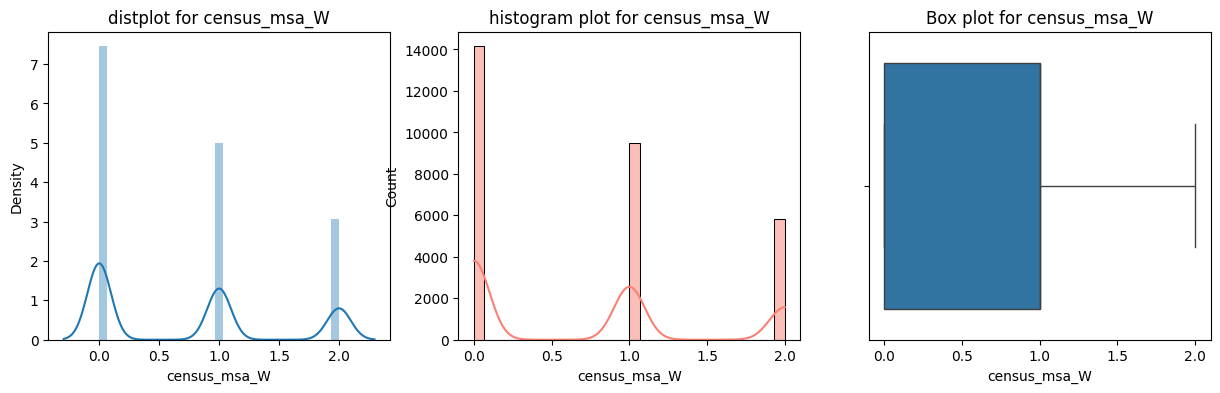

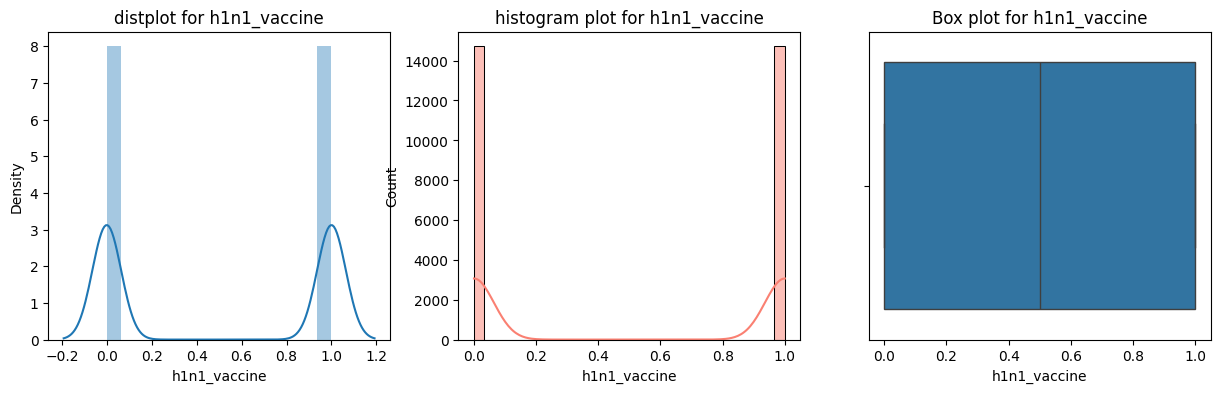

In [32]:
for k in df_resam.columns:
  plot(df_resam,k)

In [33]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [34]:
for l in df_resam.columns:
  outlier(df_resam,l)

In [35]:
df_resam['h1n1_vaccine'].unique()

array([0, 1])

In [36]:
df_resam['h1n1_vaccine'].value_counts()

h1n1_vaccine
0    14722
1    14722
Name: count, dtype: int64

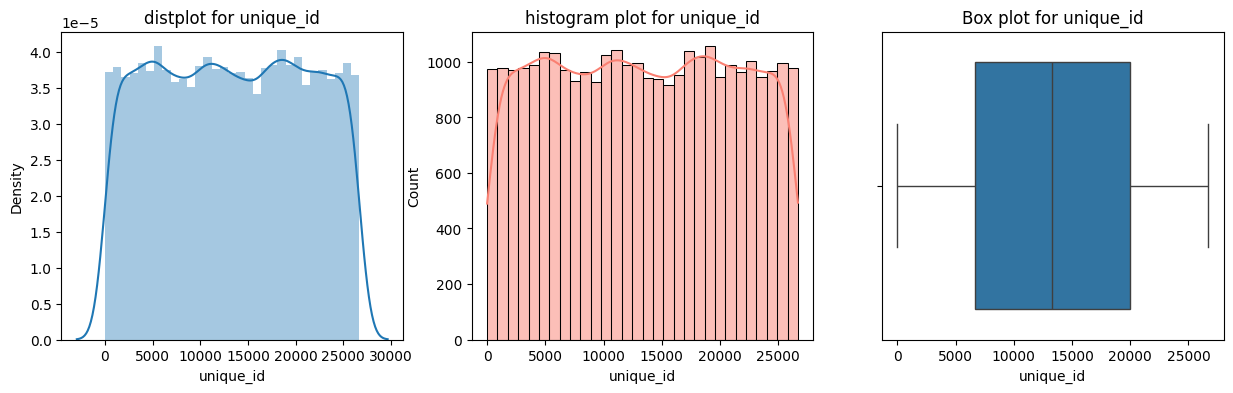

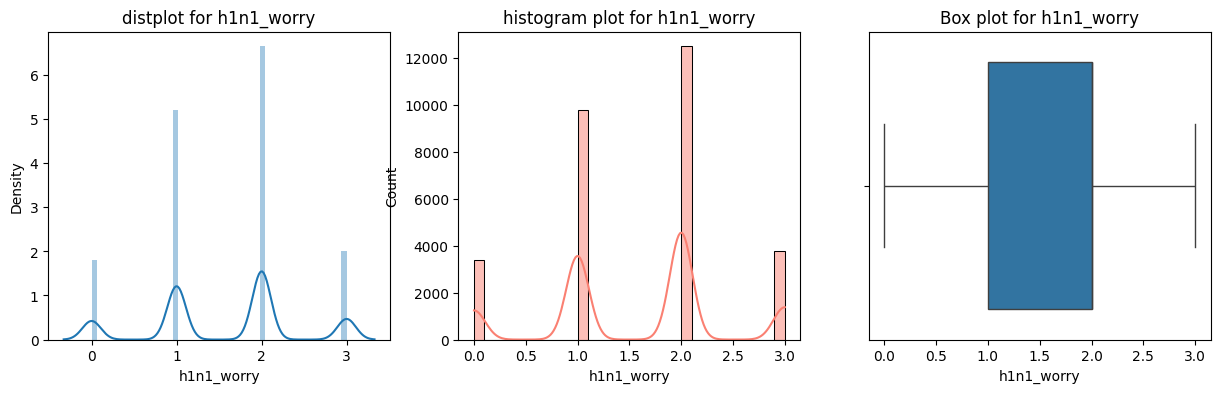

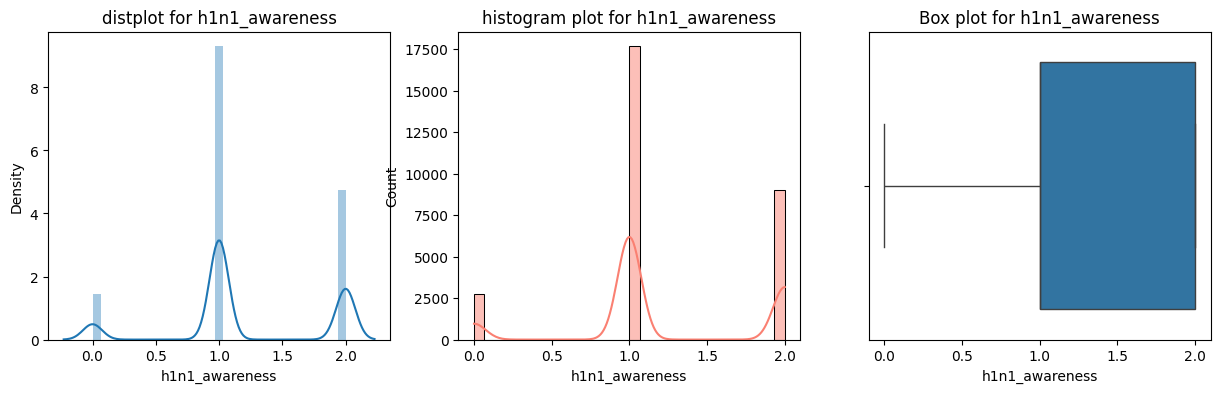

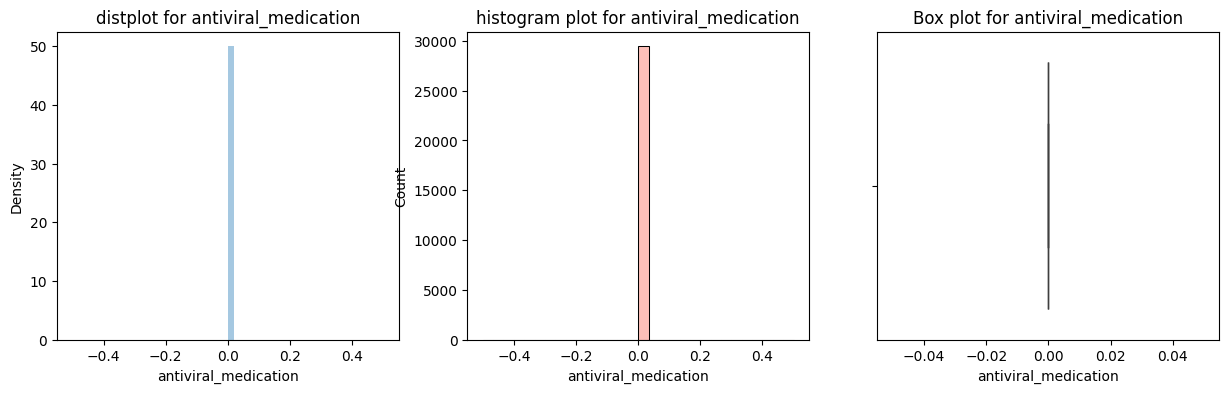

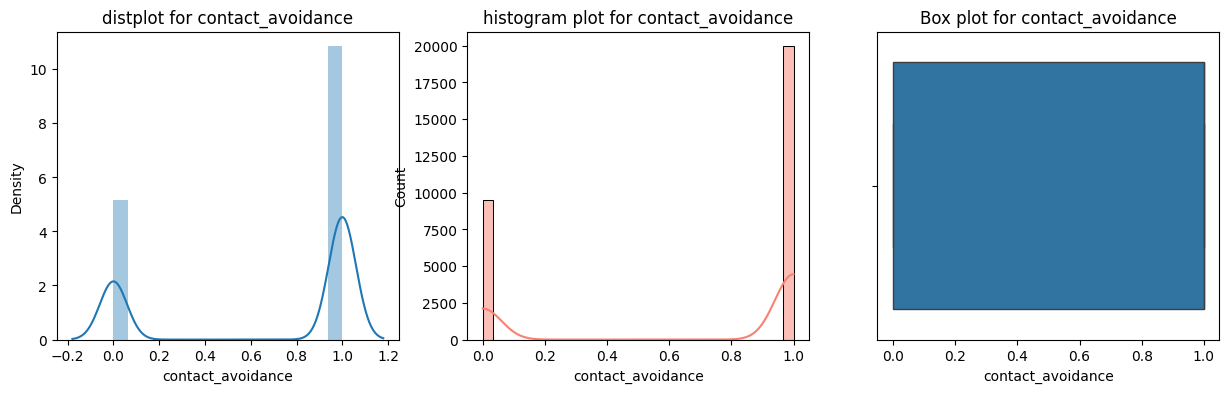

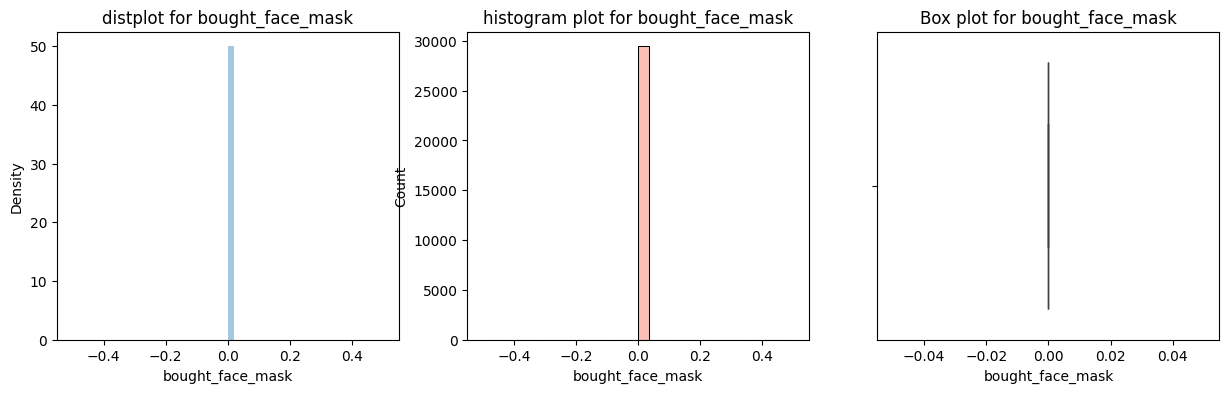

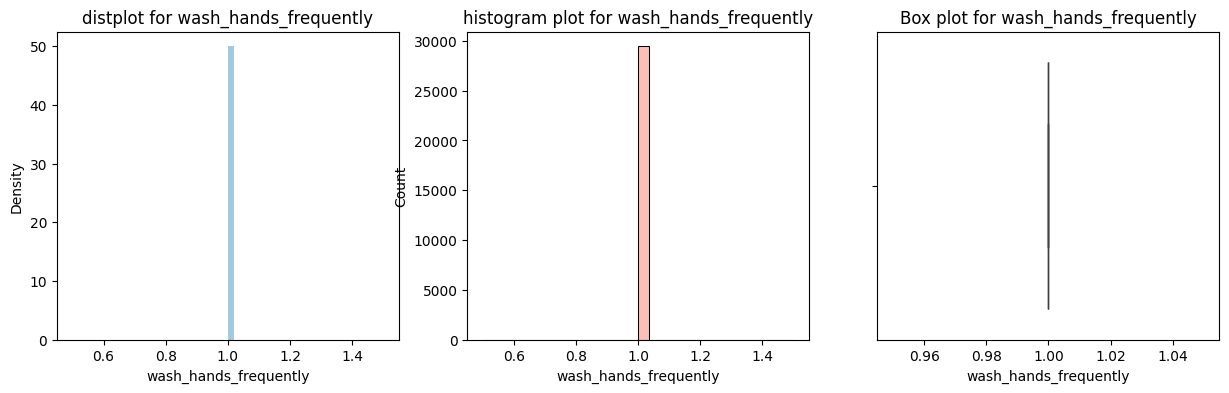

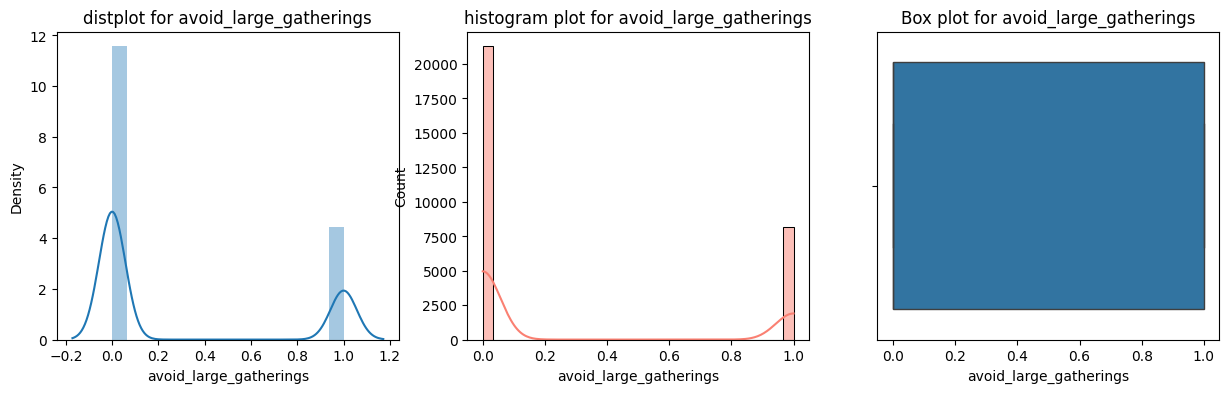

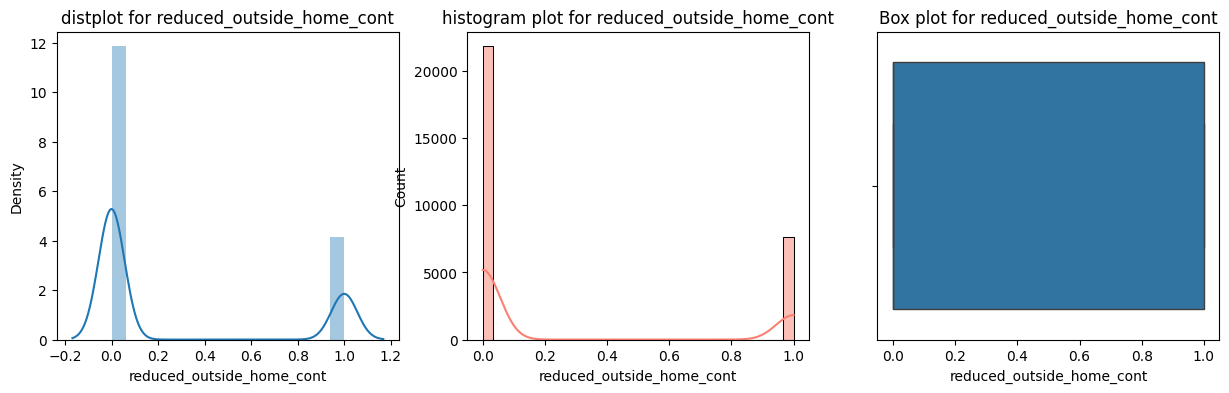

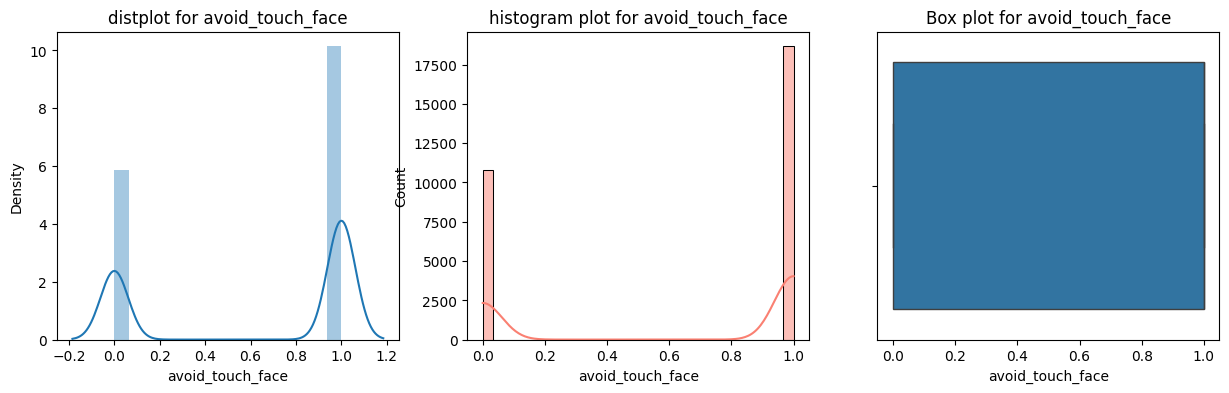

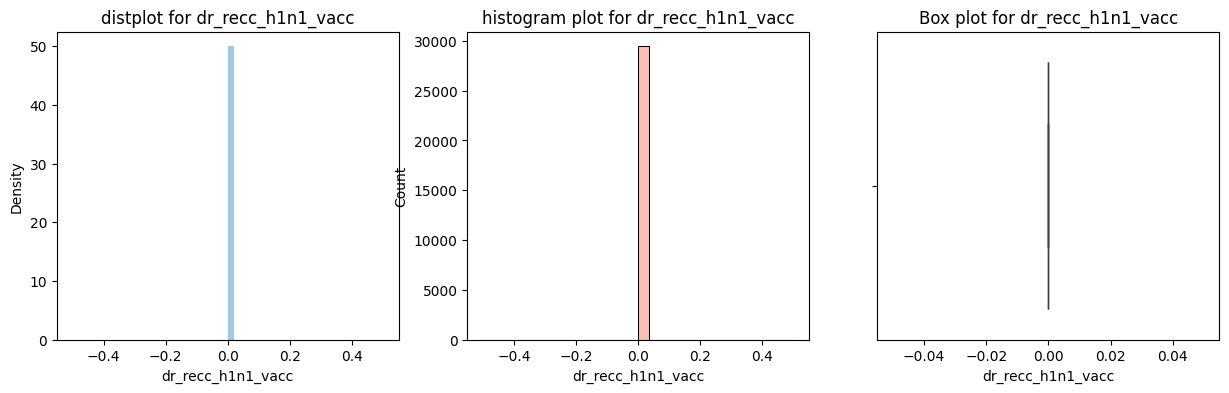

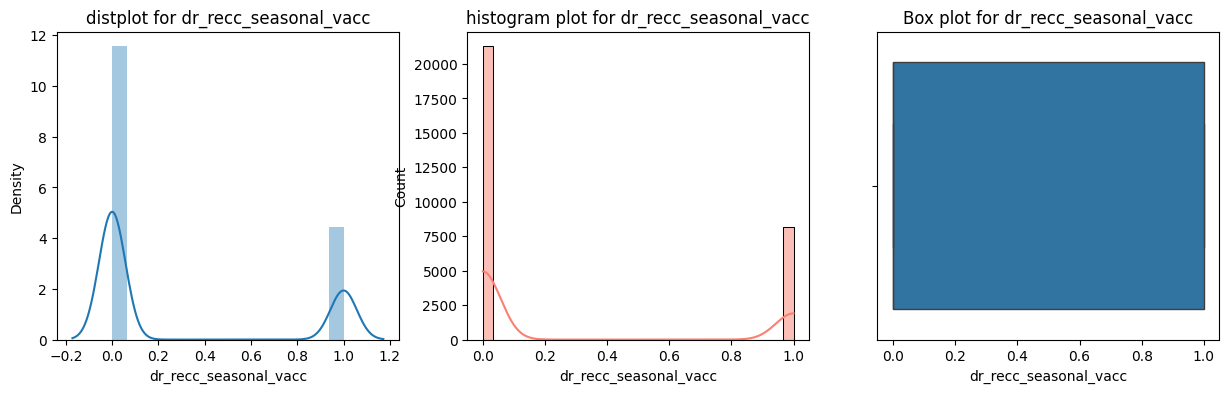

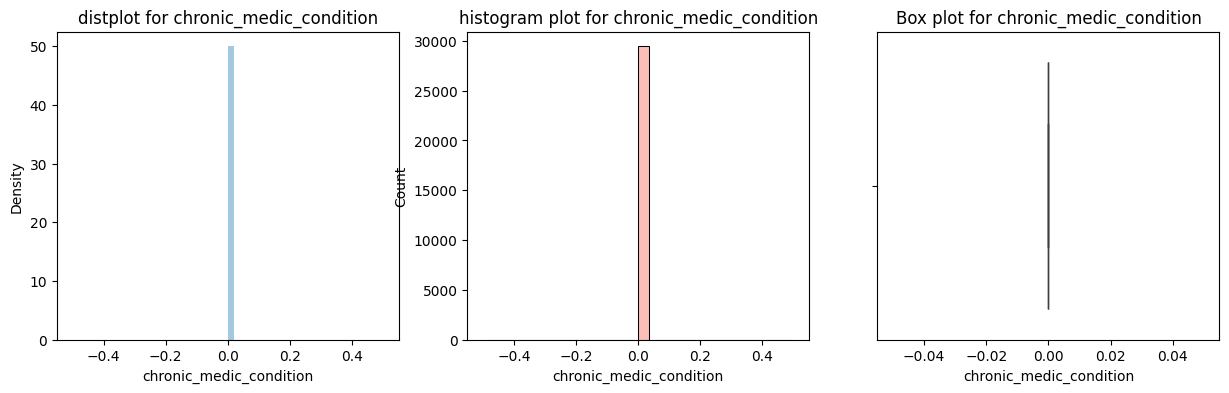

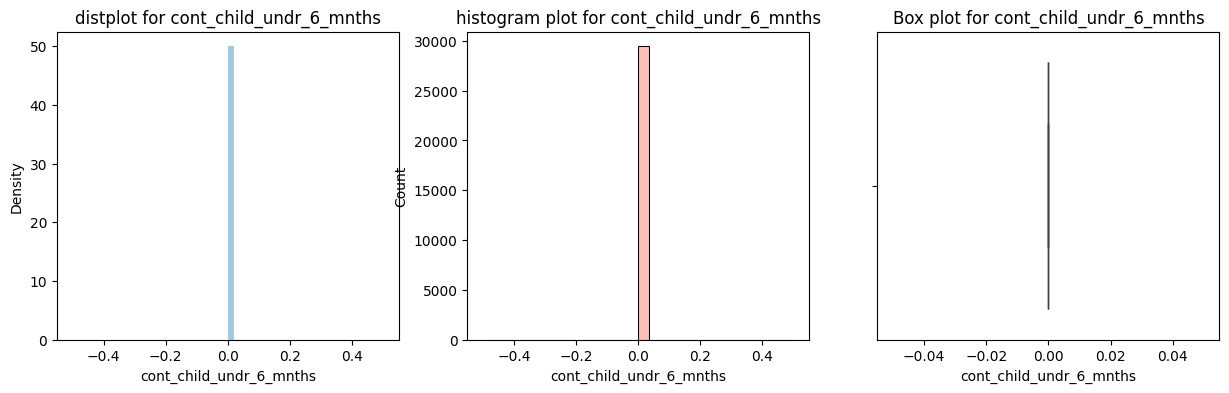

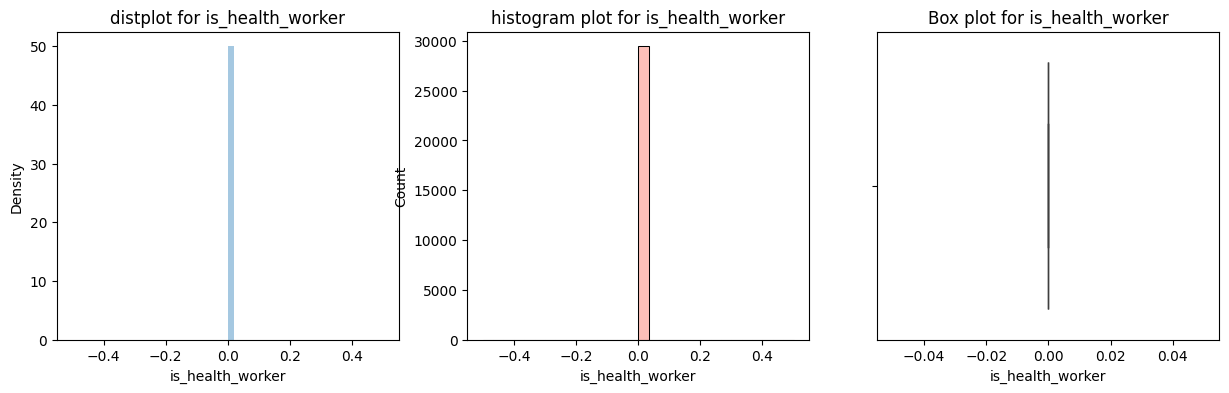

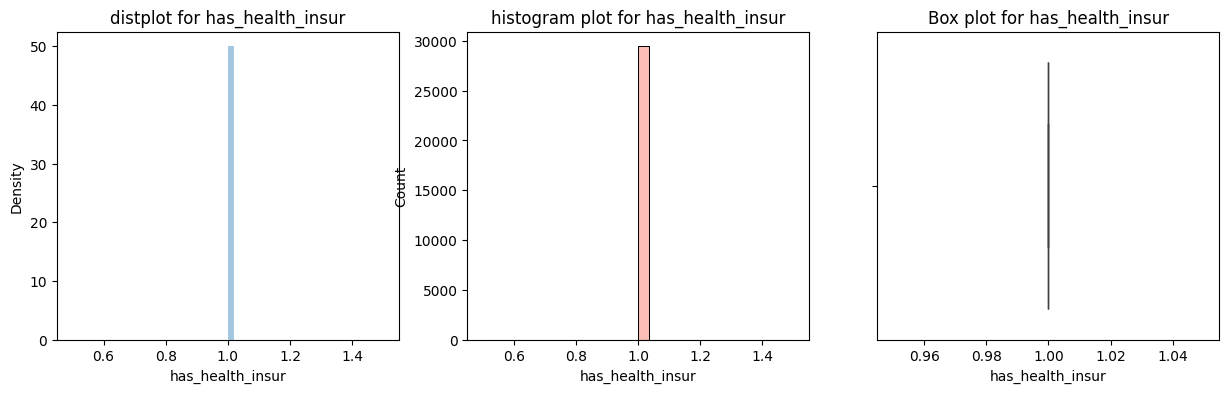

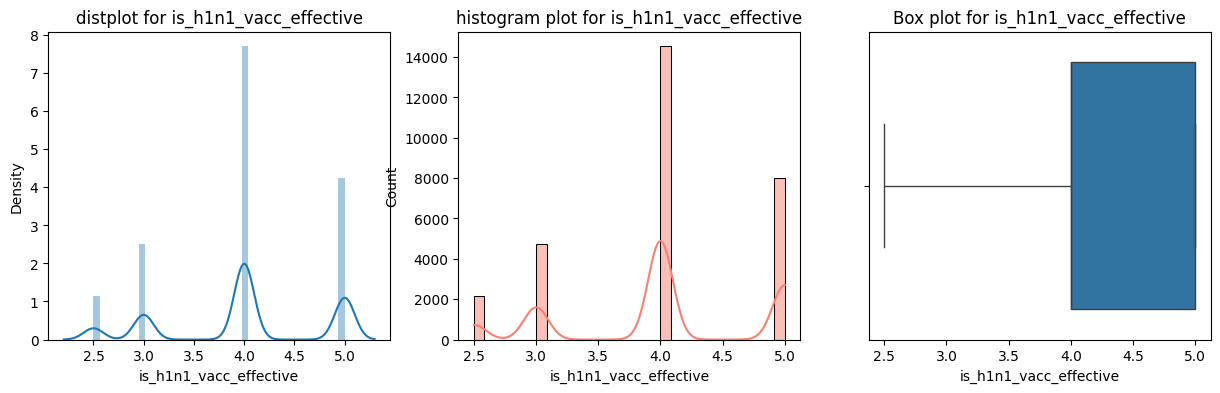

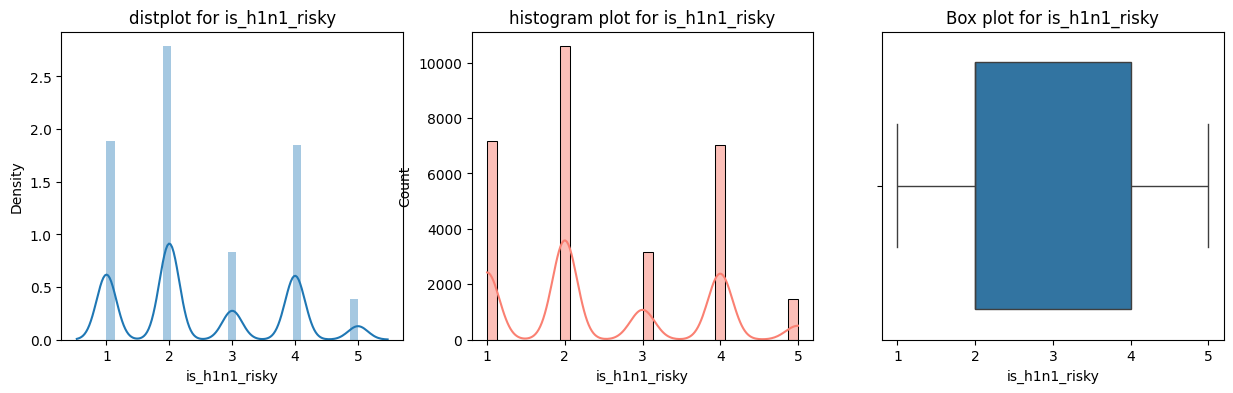

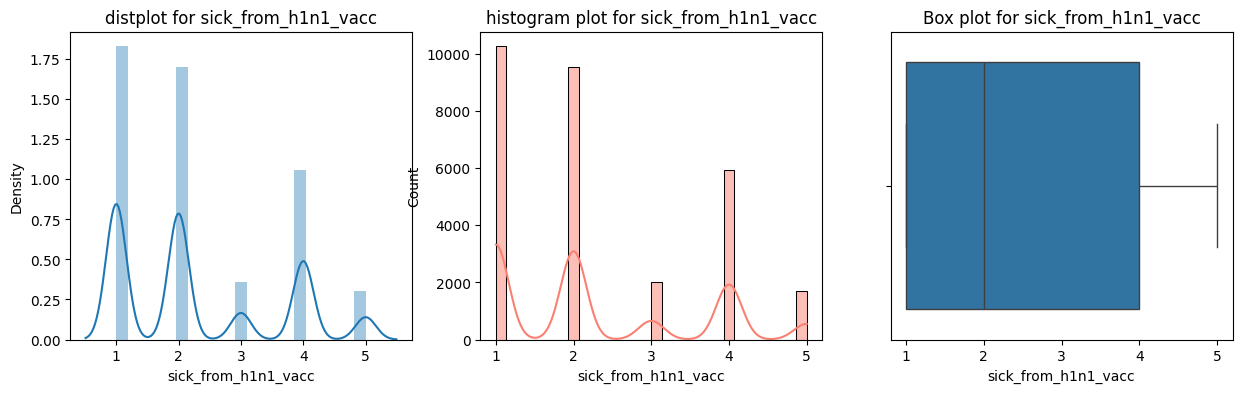

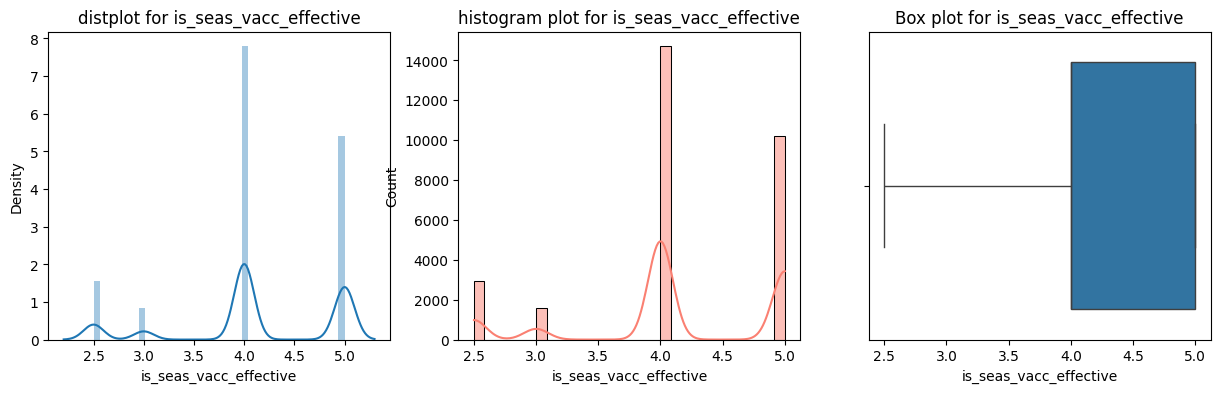

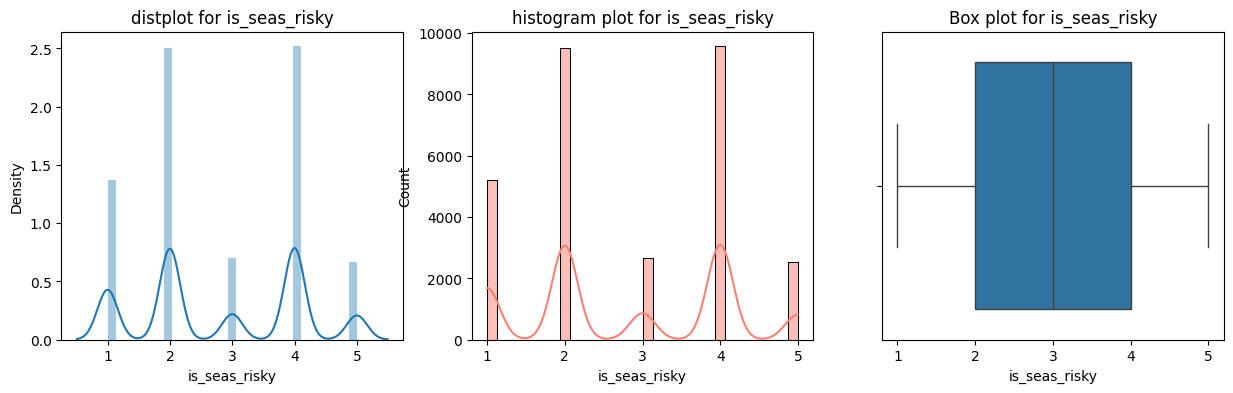

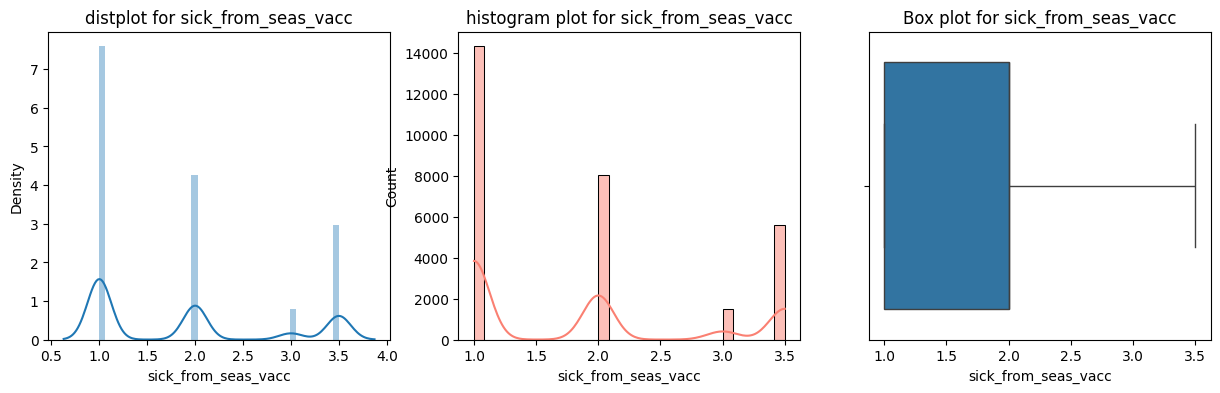

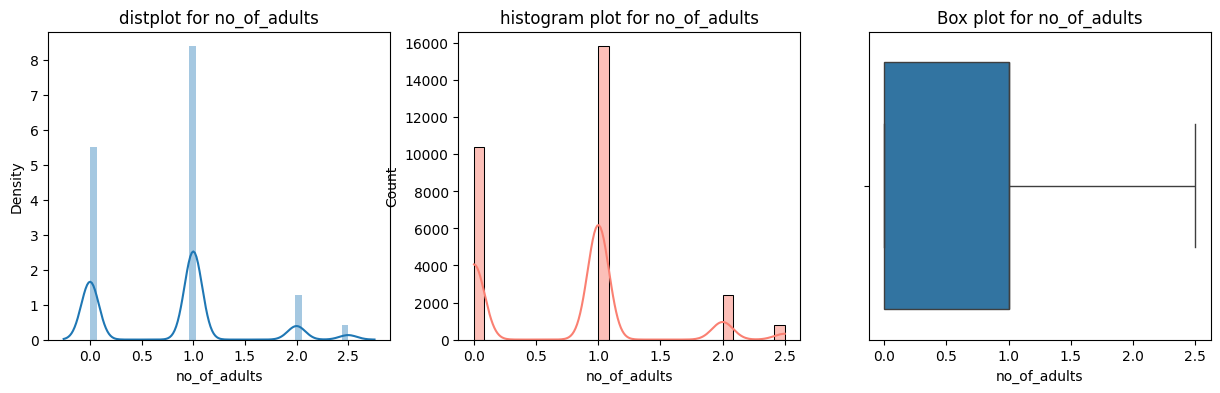

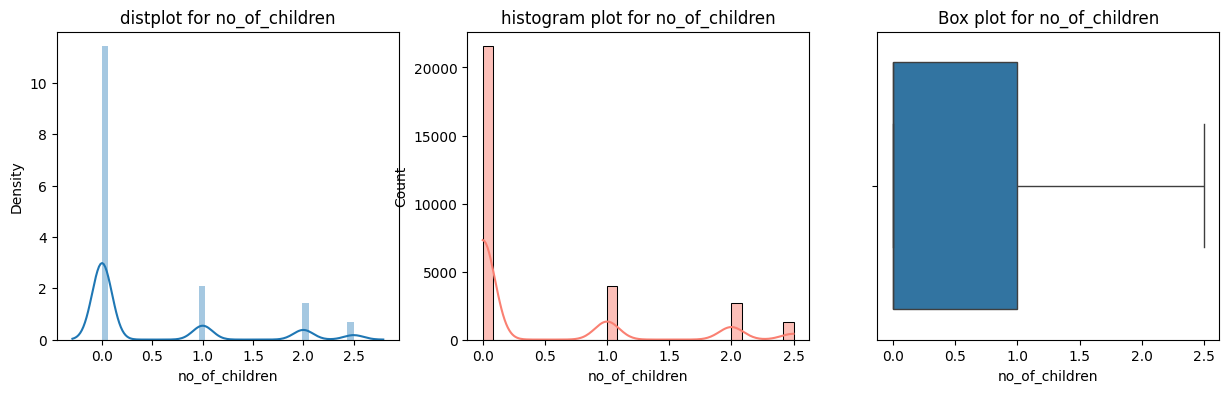

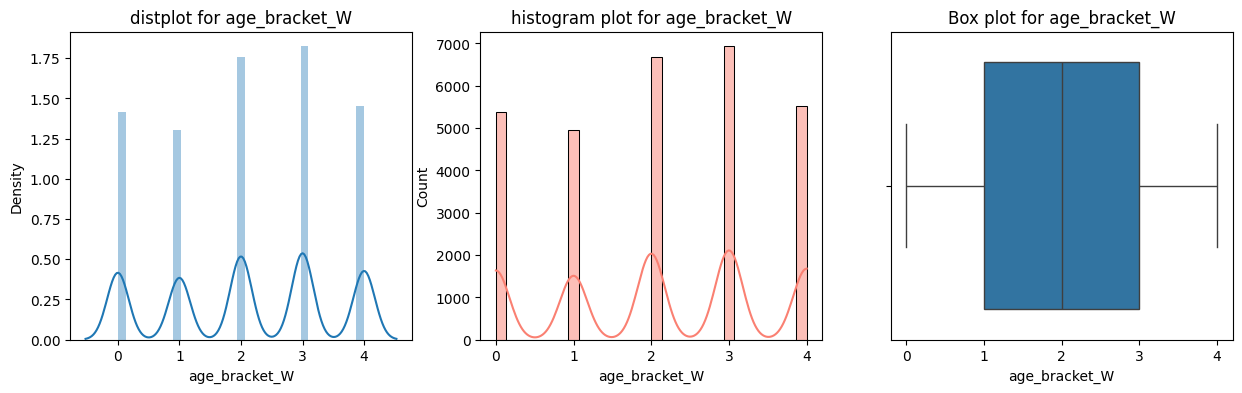

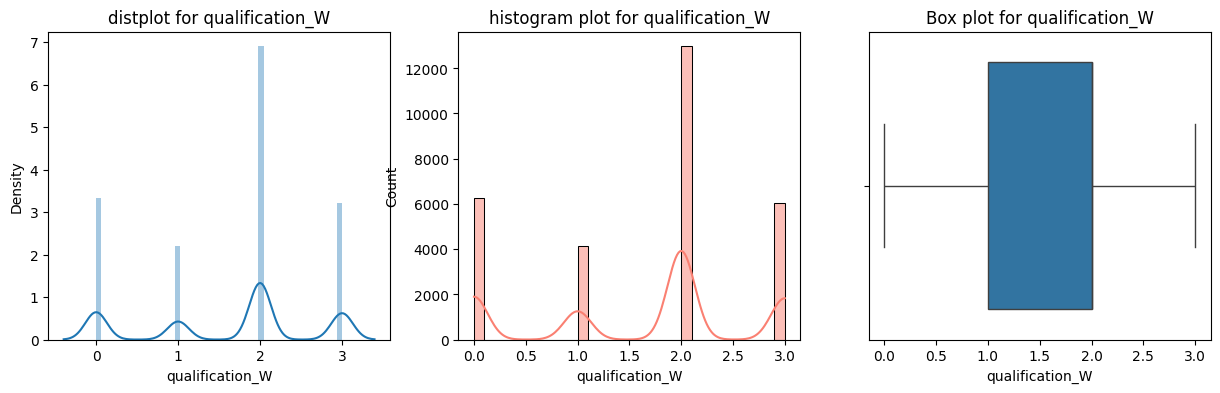

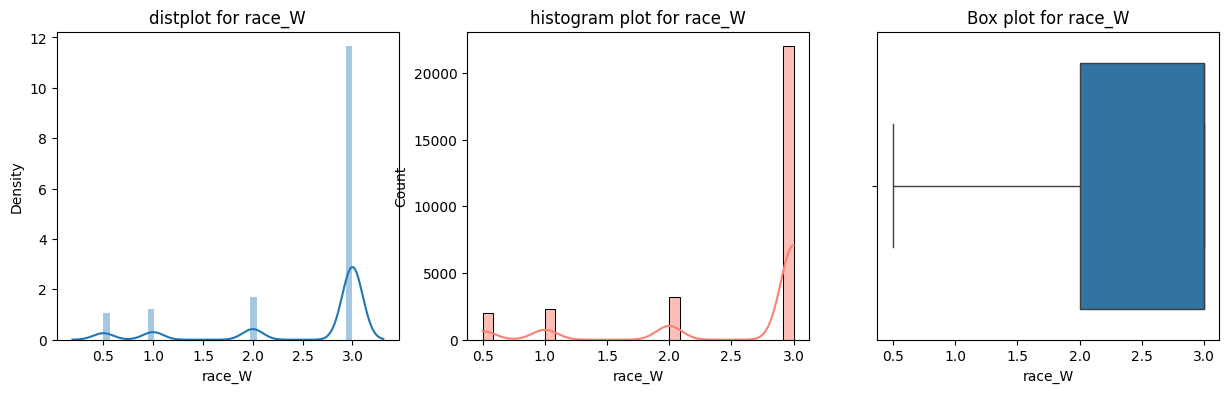

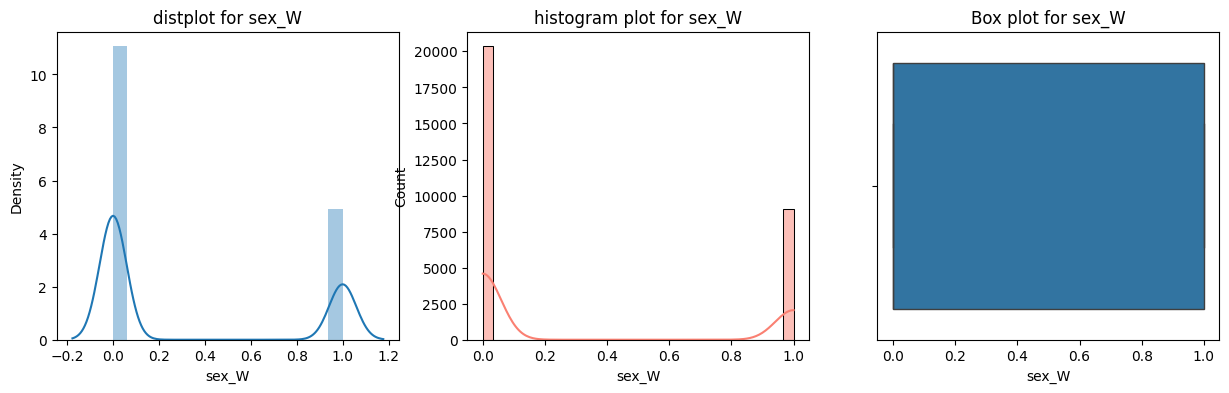

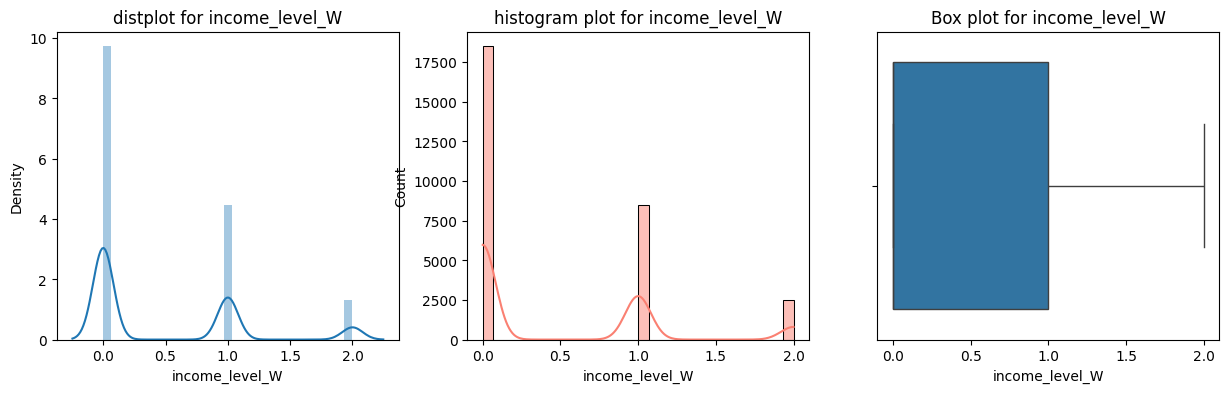

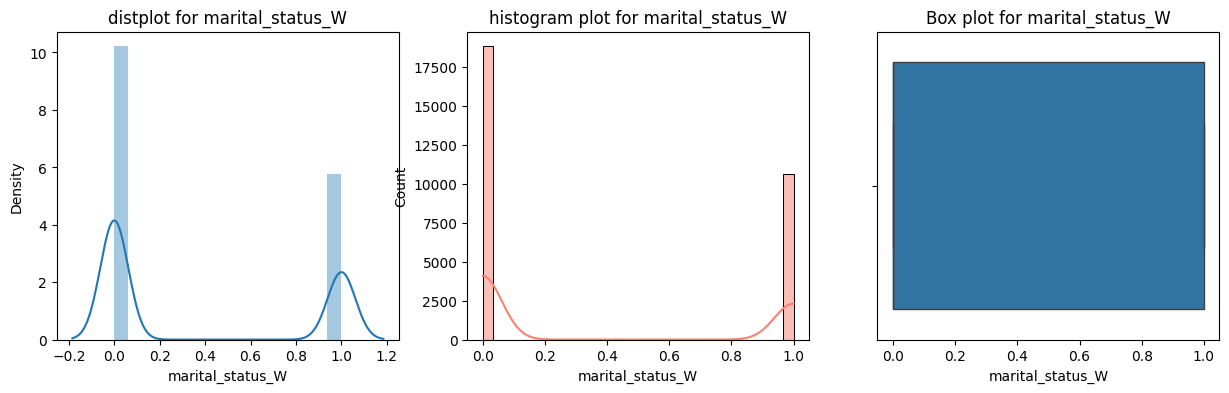

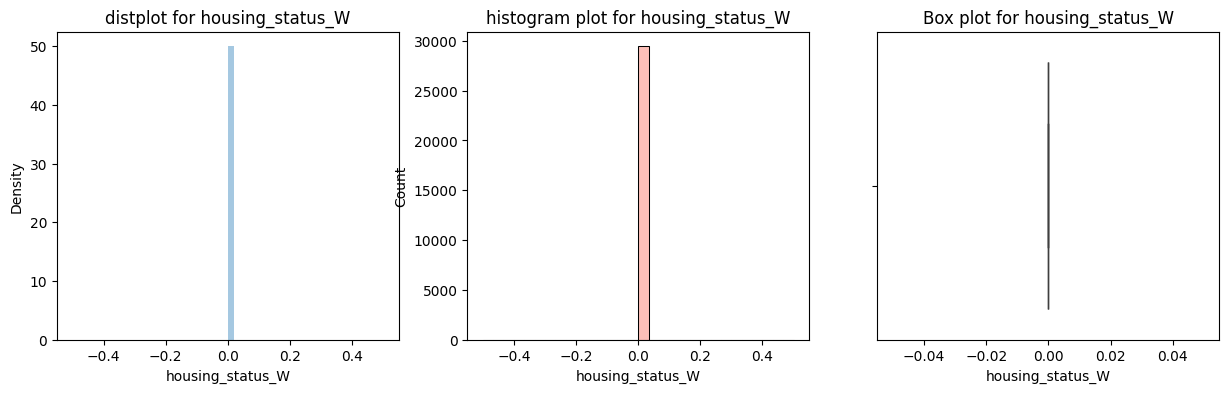

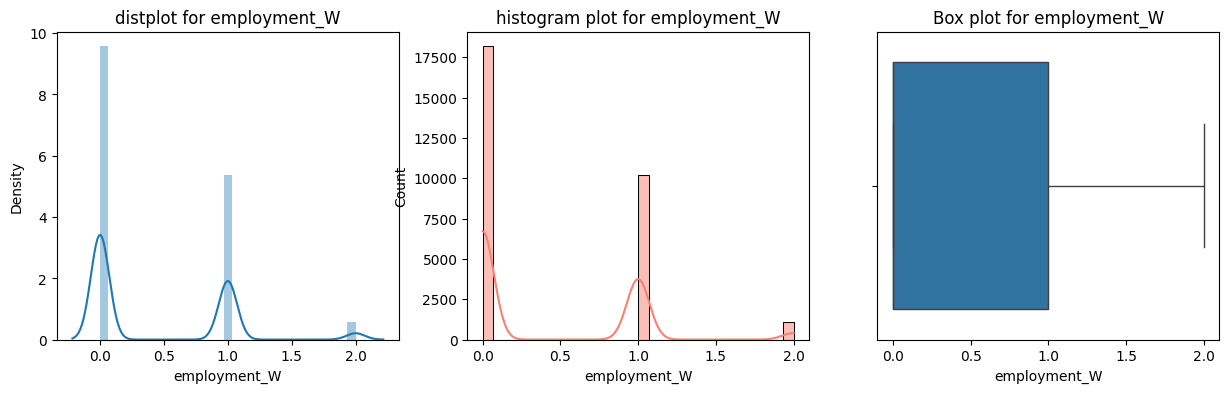

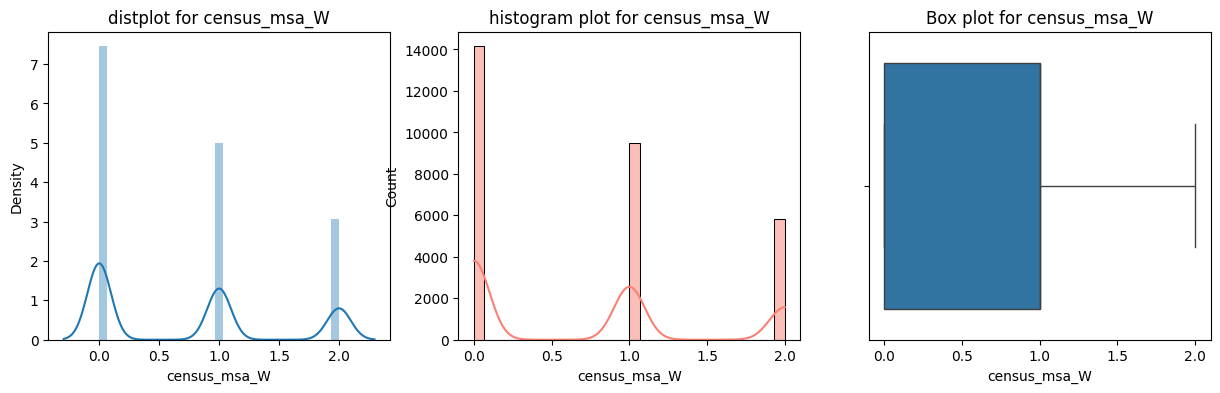

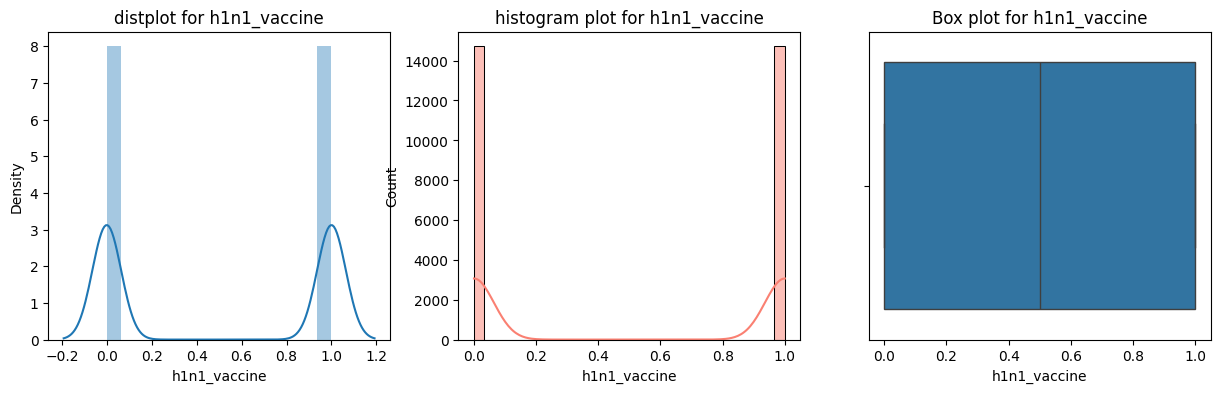

In [37]:
for m in df_resam.columns:
  plot(df_resam, m)

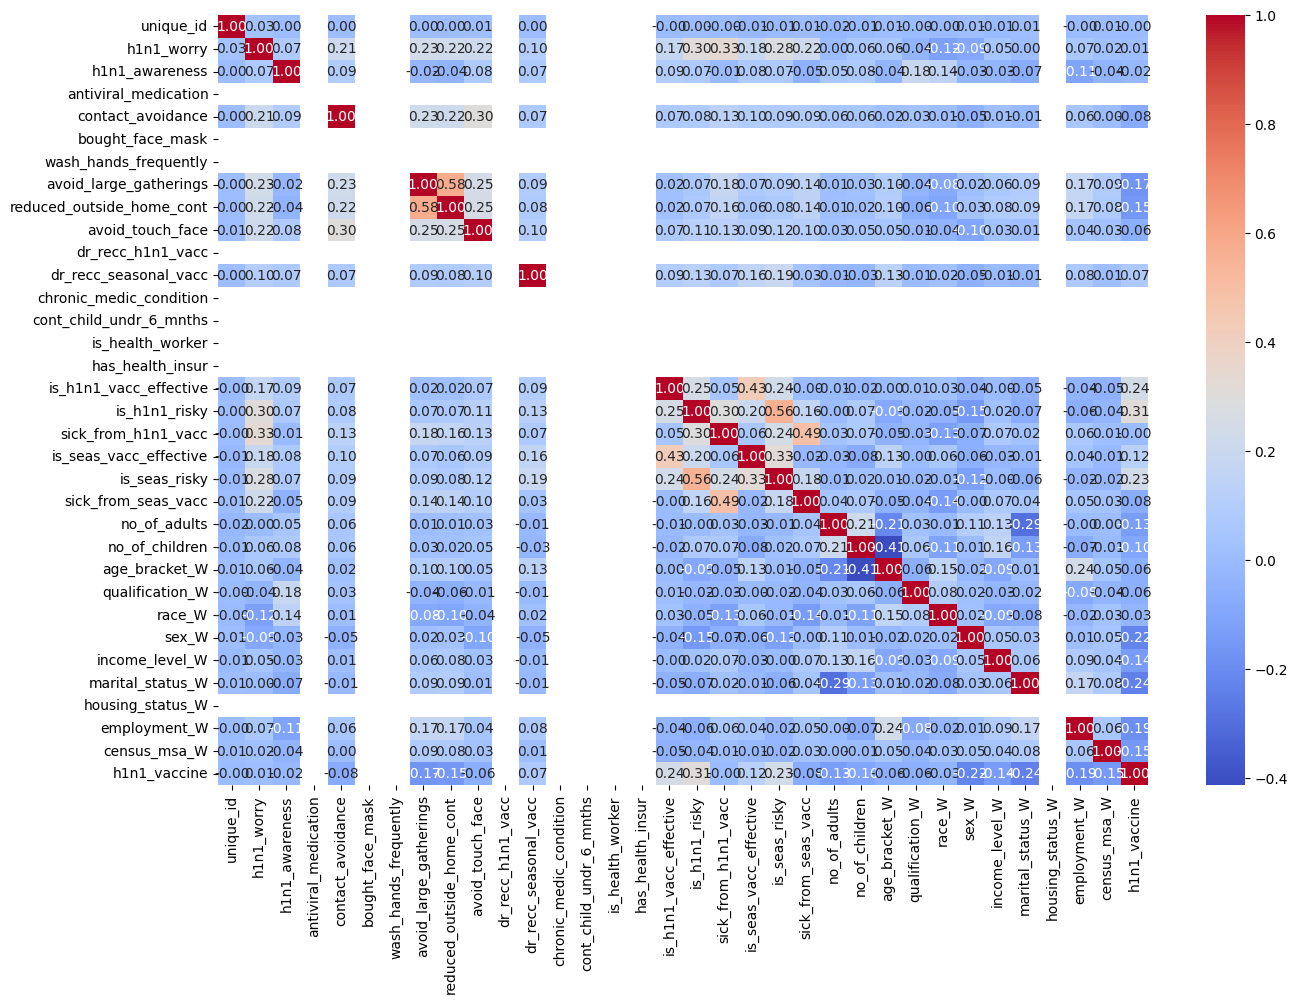

In [38]:
# Checking the Correlation using heatmap

df_corr= df_resam.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot= True, cmap="coolwarm", fmt=".2f")
plt.show()

In [39]:
#Drop the 'unique_id' column it has low co-relation
df_resam.drop(columns="unique_id", inplace=True)

In [40]:
final_df = df_resam.copy()

In [41]:
final_df.to_csv("final_df.csv")

# Classification Method - Predict

In [42]:
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import pickle

In [43]:
x= final_df.drop(columns=['h1n1_vaccine'])
y= final_df["h1n1_vaccine"]

In [44]:
x.shape,y.shape

((29444, 32), (29444,))

In [45]:
final_df["h1n1_vaccine"].unique()

array([0, 1])

In [46]:
final_df['h1n1_vaccine'].value_counts()

h1n1_vaccine
0    14722
1    14722
Name: count, dtype: int64

In [47]:
x_new,y_new= SMOTETomek().fit_resample(x,y)

In [48]:
x_new.shape,y_new.shape

((27626, 32), (27626,))

In [49]:
algo= [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier]

In [50]:
def clasmod(x_data, y_data, algorithm):

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.3, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  f1_train= f1_score(y_train, y_pred_train)
  f1_test= f1_score(y_test, y_pred_test)

  mae = mean_absolute_error(y_test, y_pred_test)

  metrics={"Algorithm":str(algorithm).split(".")[-1][:-2],
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test,
           "F1_Train": f1_train,
          "F1_Test": f1_test,
           'Mean Absolute Error' : mae
           }

  return metrics

In [51]:
for i in algo:
  print(clasmod(x_new,y_new, i))

{'Algorithm': 'LogisticRegression', 'Accuracy_Train': 0.7807425793773917, 'Accuracy_Test': 0.7904198841698842, 'F1_Train': 0.7808559024188546, 'F1_Test': 0.7892246086639971, 'Mean Absolute Error': 0.20958011583011582}
{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 0.9997414417209639, 'Accuracy_Test': 0.7614623552123552, 'F1_Train': 0.9997418821950339, 'F1_Test': 0.7665052556985945, 'Mean Absolute Error': 0.23853764478764478}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 0.9996897300651567, 'Accuracy_Test': 0.8536438223938224, 'F1_Train': 0.9996902746231675, 'F1_Test': 0.8496343126317095, 'Mean Absolute Error': 0.1463561776061776}


In [52]:
# Model training using RandomForestClassifier

#train test splitting
x_train,x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.3, random_state=42)

# Define the Random Forest model pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
rf_pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred_rf = rf_pipeline.predict(x_test)


In [53]:
y_pred_train= rf_pipeline.predict(x_train)
y_pred_test= rf_pipeline.predict(x_test)

#checking the accuracy_score
accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

f1_train= f1_score(y_train, y_pred_train)
f1_test= f1_score(y_test, y_pred_test)

mae = mean_absolute_error(y_test, y_pred_test)

metrics={"Algorithm": 'RandomForestClassifier',
          "Accuracy_Train": accuracy_train,
          "Accuracy_Test": accuracy_test,
         "F1_Train": f1_train,
          "F1_Test": f1_test,
          'Mean Absolute Error' : mae
          }

print(metrics)

{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 0.9997414417209639, 'Accuracy_Test': 0.8540057915057915, 'F1_Train': 0.9997419088422032, 'F1_Test': 0.8498386696450733, 'Mean Absolute Error': 0.1459942084942085}


Random Forest - Accuracy: 0.8540057915057915


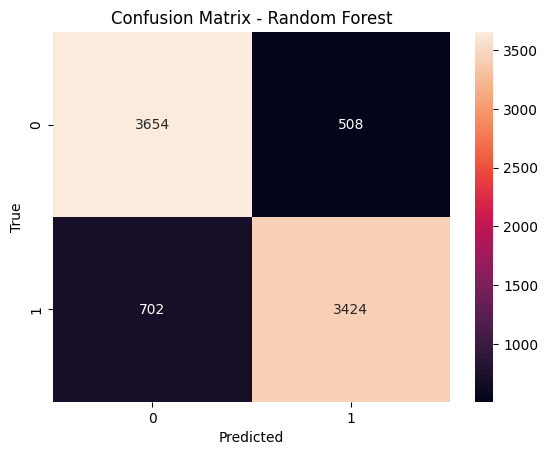

In [74]:
# Evaluate the model
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
#print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [57]:
#saving the model using the pickle

with open("vacc_model.pkl","wb") as f:
  pickle.dump(rf_pipeline,f)

In [58]:
with open(r'vacc_model.pkl',"rb") as f1:
  class_model= pickle.load(f1)

In [59]:
final_df.head(2)

h1n1_worry  h1n1_awareness  antiviral_medication  contact_avoidance  \
0           2               1                     0                  1   
1           2               2                     0                  1   

   bought_face_mask  wash_hands_frequently  avoid_large_gatherings  \
0                 0                      1                       0   
1                 0                      1                       0   

   reduced_outside_home_cont  avoid_touch_face  dr_recc_h1n1_vacc  ...  \
0                          0                 1                  0  ...   
1                          0                 1                  0  ...   

   age_bracket_W  qualification_W  race_W  sex_W  income_level_W  \
0              0                2     0.5      0               0   
1              3                2     3.0      0               1   

   marital_status_W  housing_status_W  employment_W  census_msa_W  \
0                 0                 0             1             2   
1                 0                 0             0             1   

   h1n1_vaccine  
0             0  
1             0  

[2 rows x 33 columns]

In [60]:
check = [1,1,0,0,0,1,0,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0]

print(len(check))

32


In [61]:
y_pred_1 = class_model.predict([check])
y_pred_1[0]

0

# Streamlit App

In [62]:
!pip install streamlit
!pip install streamlit-option-menu
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.4/823.4 kB 15.8 MB/s eta 0:00:00


In [72]:
%%writefile VaccineUsage.py

# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import streamlit as st
import pickle
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from streamlit_option_menu import option_menu

def age_bracket_mapping(age_bracket):
  if age_bracket == '55 - 64 Years':
    age_bracket_1= int(3)
  elif age_bracket == '35 - 44 Years':
    age_bracket_1= int(1)
  elif age_bracket == '18 - 34 Years':
    age_bracket_1= int(0)
  elif age_bracket == '65+ Years':
    age_bracket_1= int(4)
  elif age_bracket == '45 - 54 Years':
    age_bracket_1= int(2)
  return age_bracket_1

def qualification_mapping(qualification):
  if qualification == '< 12 Years':
    qualification_1= int(1)
  elif qualification == '12 Years':
    qualification_1= int(0)
  elif qualification == 'College Graduate':
    qualification_1= int(2)
  elif qualification == 'Some College':
    qualification_1= int(3)
  return qualification_1

def race_mapping(race):
  if race == 'White':
    race_1= int(3)
  elif race == 'Black':
    race_1= int(0)
  elif race == 'Other or Multiple':
    race_1= int(2)
  elif race == 'Hispanic':
    race_1= int(1)
  return race_1

def sex_mapping(sex):
  if sex == 'Female':
    sex_1= int(0)
  elif sex == 'Male':
    sex_1= int(1)
  return sex_1

def income_level_mapping(income_level):
  if income_level == 'Below Poverty':
    income_level_1= int(2)
  elif income_level == '<= $75,000, Above Poverty':
    income_level_1= int(0)
  elif income_level == '> $75,000':
    income_level_1= int(1)
  return income_level_1

def marital_status_mapping(marital_status):
  if marital_status == 'Not Married':
    marital_status_1= int(1)
  elif marital_status == 'Married':
    marital_status_1= int(0)
  return marital_status_1

def housing_status_mapping(housing_status):
    if housing_status == 'Own':
      housing_status_1= int(0)
    elif housing_status == 'Rent':
      housing_status_1= int(1)
    return housing_status_1

def employment_mapping(employment):
    if employment == 'Not in Labor Force':
      employment_1= int(1)
    elif employment == 'Employed':
      employment_1= int(0)
    elif employment == 'Unemployed':
      employment_1= int(2)
    return employment_1

def census_msa_mapping(census_msa):
  if census_msa == 'Non-MSA':
    census_msa_1= int(2)
  elif census_msa == 'MSA, Not Principle  City':
    census_msa_1= int(0)
  elif census_msa == 'MSA, Principle City':
    census_msa_1= int(1)
  return census_msa_1

def predict_price(h1n1_worry,h1n1_awareness,antiviral_medication,
                contact_avoidance,bought_face_mask,wash_hands_frequently,
                avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,
                chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,
                is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,
                race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children):

  age_bracket_2= age_bracket_mapping(age_bracket)
  qualification_2= qualification_mapping(qualification)
  race_2= race_mapping(race)
  sex_2= sex_mapping(sex)
  income_level_2= income_level_mapping(income_level)
  marital_status_2= marital_status_mapping(marital_status)
  housing_status_2= housing_status_mapping(housing_status)
  employment_2= employment_mapping(employment)
  census_msa_2= census_msa_mapping(census_msa)


  with open("vacc_model.pkl","rb") as f:
    regg_model= pickle.load(f)

  user_data = np.array([[h1n1_worry,h1n1_awareness,antiviral_medication,
                        contact_avoidance,bought_face_mask, wash_hands_frequently,
                          avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,
                          chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,
                          is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket_2,qualification_2,
                          race_2,sex_2,income_level_2,marital_status_2,housing_status_2,employment_2,census_msa_2,no_of_adults,no_of_children]])
  y_pred_1 = regg_model.predict(user_data)
  price= np.exp(y_pred_1[0])

  return round(price)

df= pd.read_csv("Vaccine_proper.csv")

st.set_page_config(layout="wide")
st.title(":rainbow[Vaccine Usage analysis and prediction]")
st.write("")

option = option_menu(None, options=["Data Exploration", "Vaccine Prediction"],
                     icons=['cloud-upload', 'gear'], menu_icon="cast", default_index=0, orientation="horizontal",
                    styles={"container": {"padding": "0!important", "background-color": "#17202A"},
                            "icon": {"color": "#9A7D0A", "font-size": "25px"},
                            "nav-link": {"font-size": "25px", "text-align": "left", "margin":"0px", "--hover-color": "#808080"},
                            "nav-link-selected": {"background-color": "#808000"},
                            })

if option == "Data Exploration":
  tab1, tab2, tab3= st.tabs(["Age_Analysis", "Employment", "h1n1 Effect"])

  with tab1:
    st.title("**Age Analysis**")
    col1,col2= st.columns(2)
    with col1:
      age = st.selectbox("Select Age",df["age_bracket"].unique())
      df1= df[df["age_bracket"] == age]
      df1.reset_index(drop= True, inplace= True)

      df_bar = pd.DataFrame(df1.groupby('sex')[["no_of_adults","no_of_children","h1n1_vaccine"]].sum())

      fig_bar = px.bar(df_bar, x=df_bar.index, y=["no_of_adults","no_of_children","h1n1_vaccine"], barmode='group', width=600, height=500)

      st.plotly_chart(fig_bar)

    with col2:

      housing= st.selectbox("Select the housing_status",df["housing_status"].unique())

      df2= df[df["housing_status"] == housing]
      df2.reset_index(drop= True, inplace= True)

      df_pie = pd.DataFrame(df2.groupby('age_bracket')[["h1n1_vaccine", "is_health_worker"]].sum())
      df_pie.reset_index(inplace= True)

      fig_pie = px.pie(df_pie,  values="h1n1_vaccine", names= "age_bracket",
                  hover_data=["is_health_worker"],
                  title="housing_status",
                  width= 600, height= 500)

      st.plotly_chart(fig_pie)

  with tab2:
    st.title("Employment Analysis")
    col1,col2= st.columns(2)

    with col1:
      employment= st.selectbox("Select the employment",df["employment"].unique())

      df1_e= df[df["employment"] == employment]
      df1_e.reset_index(drop= True, inplace= True)

      census_msa= st.selectbox("Select the census_msa",df1_e["census_msa"].unique())

      df2_e= df1_e[df1_e["census_msa"] == census_msa]
      df2_e.reset_index(drop= True, inplace= True)

      df_e_sunb_in= px.sunburst(df2_e, path=["income_level","marital_status","housing_status"], values="h1n1_vaccine",width=600,height=500,title="h1n1_vaccine",color_discrete_sequence=px.colors.sequential.Peach_r)
      st.plotly_chart(df_e_sunb_in)

    with col2:
        sex= st.selectbox("Select the sex",df["sex"].unique())

        df3_e= df[df["sex"] == sex]
        df3_e.reset_index(drop= True, inplace= True)

        age_bracket= st.selectbox("Select the age_bracket",df3_e["age_bracket"].unique())

        df4_e= df3_e[df3_e["age_bracket"] == age_bracket]
        df4_e.reset_index(drop= True, inplace= True)

        df_e_sunb_q= px.sunburst(df4_e, path=["qualification","race","employment"], values="h1n1_vaccine",width=600,height=500,title="Employment",color_discrete_sequence=px.colors.sequential.Blues_r)
        st.plotly_chart(df_e_sunb_q)


  with tab3:
    st.title("**H1N1 Effect**")
    col1,col2= st.columns(2)

    with col1:

      df_bar3= pd.DataFrame(df3_e.groupby("age_bracket")[["h1n1_worry","h1n1_awareness","antiviral_medication",'contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont']].sum())
      df_bar3.reset_index(inplace= True)

      fig_do_bar4 = px.line(df_bar3, x='age_bracket', y=["h1n1_worry","h1n1_awareness","antiviral_medication",'contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont'],
          title='Age',color_discrete_sequence=px.colors.sequential.Rainbow, width=600, height=500)

      st.plotly_chart(fig_do_bar4)

    with col2:

      df_bar4= pd.DataFrame(df3_e.groupby("age_bracket")[["avoid_touch_face","dr_recc_h1n1_vacc","dr_recc_seasonal_vacc",'chronic_medic_condition','cont_child_undr_6_mnths','is_health_worker','has_health_insur','h1n1_vaccine']].sum())
      df_bar4.reset_index(inplace= True)

      fig_do_bar5 = px.line(df_bar4, x='age_bracket', y=["avoid_touch_face","dr_recc_h1n1_vacc","dr_recc_seasonal_vacc",'chronic_medic_condition','cont_child_undr_6_mnths','is_health_worker','has_health_insur','h1n1_vaccine'],
          title='Age',color_discrete_sequence=px.colors.sequential.Redor_r, width=600, height=500)

      st.plotly_chart(fig_do_bar5)

elif option == "Vaccine Prediction":

  col1,col2,col3,col4= st.columns(4)
  with col1:
    h1n1_worry= st.selectbox("Select the h1n1_worry",[0,1,2,3])
    h1n1_awareness= st.selectbox("Select the h1n1_awareness",[0,1,2])
    antiviral_medication= st.selectbox("Select the antiviral_medication",[0,1])
    contact_avoidance= st.selectbox("Select the contact_avoidance",[0,1])
    bought_face_mask= st.selectbox("Select the bought_face_mask",[0,1])
    wash_hands_frequently= st.selectbox("Select the wash_hands_frequently",[0,1])
    avoid_large_gatherings= st.selectbox("Select the avoid_large_gatherings",[0,1])
    reduced_outside_home_cont= st.selectbox("Select the reduced_outside_home_cont",[0,1])

  with col2:
    avoid_touch_face= st.selectbox("Select the avoid_touch_face",[0,1])
    dr_recc_h1n1_vacc= st.selectbox("Select the dr_recc_h1n1_vacc",[0,1])
    dr_recc_seasonal_vacc= st.selectbox("Select the dr_recc_seasonal_vacc",[0,1])
    chronic_medic_condition= st.selectbox("Select the chronic_medic_condition",[0,1])
    cont_child_undr_6_mnths= st.selectbox("Select the cont_child_undr_6_mnths",[0,1])
    is_health_worker= st.selectbox("Select the is_health_worker",[0,1])
    has_health_insur= st.selectbox("Select the has_health_insur",[0,1])
    is_h1n1_vacc_effective= st.selectbox("Select the is_h1n1_vacc_effective",[1,2,3,4,5])

  with col3:
    is_h1n1_risky= st.selectbox("Select the is_h1n1_risky",[1,2,3,4,5])
    sick_from_h1n1_vacc= st.selectbox("Select the sick_from_h1n1_vacc",[1,2,3,4,5])
    is_seas_vacc_effective= st.selectbox("Select the is_seas_vacc_effective",[1,2,3,4,5])
    is_seas_risky= st.selectbox("Select the is_seas_risky",[1,2,3,4,5])
    sick_from_seas_vacc= st.selectbox("Select the sick_from_seas_vacc",[1,2,3,4,5])
    age_bracket= st.selectbox("Select the age_bracket",['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years','45 - 54 Years'])
    qualification= st.selectbox("Select the qualification",['< 12 Years', '12 Years', 'College Graduate', 'Some College'])
    race= st.selectbox("Select the race",['White', 'Black', 'Other or Multiple', 'Hispanic'])

  with col4:
    sex= st.selectbox("Select the sex",['Female', 'Male'])
    income_level= st.selectbox("Select the income_level",['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'])
    marital_status= st.selectbox("Select the marital_status",['Not Married', 'Married'])
    housing_status= st.selectbox("Select the housing_status",['Own', 'Rent'])
    employment= st.selectbox("Select the employment",['Not in Labor Force', 'Employed', 'Unemployed'])
    census_msa= st.selectbox("Select the census_msa",['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'])
    no_of_adults= st.selectbox("Select the no_of_adults",[0,1,2,3])
    no_of_children= st.selectbox("Select the no_of_children",[0,1,2,3])


  button= st.button("Predict the Vaccine Usage")

  if button:


    pre_price= predict_price(h1n1_worry,h1n1_awareness,antiviral_medication,
              contact_avoidance,bought_face_mask,wash_hands_frequently,
              avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,
              chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,
              is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,
              race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children)

    if pre_price == 1:
      st.write("## :green[**The H1N1 vaccine : Yes**]")
    else:
      st.write("## :red[**The H1N1 vaccine : No**]")

Overwriting VaccineUsage.py


In [64]:
!streamlit run VaccineUsage.py&>/dev/null&

In [65]:
!ngrok config add-authtoken 2ciFzJOr8PUy2NH2wKDfMLha8rG_6y1YLoW7AgXxQmuFFGJsU

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


# Ngrok

In [66]:
from pyngrok import ngrok

public_url = ngrok.connect(addr='8501')
print(public_url)

NgrokTunnel: "https://5529-35-233-135-245.ngrok-free.app" -> "http://localhost:8501"
